In [4]:
import xarray as xr
#dirs = "/Users/kelcy/PYTHON/tracer-jcss_EBfork/"
#postfix = ['20160331','20160430','20170405','20170430','20220330','20220405','20220322','20220413']
dirs = "/home/jovyan/efs/tracer/NEXRAD/"
postfix = ['20220604']#,'20220617','20220622','20220702','20220706','20220712','20220713','20220714',
          # '20220728','20220729','20220801','20220802','20220803','20220806','20220807','20220808','20220813','20220821',
          #'20220825','20220827','20220831','20220901','20220915','20220917']#'20220602'
# postfix = ['20160430']

savedir = dirs + "tobac_Save_"+'20220604'+'/'
    # print(savedir)
Track = xr.open_dataset(savedir+"Track_features_merges.nc")
#     track = xr.open_dataset(savedir+"timeseries_data_"+"new.nc")
timeseries = xr.open_dataset(savedir+"timeseries_data_melt4400.nc")
    # date = i


In [95]:
both_ds

<xarray.Dataset>
Dimensions:                           (feature: 3671, time: 656, y: 1001,
                                       x: 1001, track: 168, cell: 231)
Coordinates:
  * feature                           (feature) int64 1 2 3 4 ... 3669 3670 3671
  * time                              (time) datetime64[ns] 2022-06-04T02:01:...
  * y                                 (y) float64 -2.5e+05 ... 2.5e+05
  * x                                 (x) float64 -2.5e+05 ... 2.5e+05
  * track                             (track) float64 0.0 1.0 ... 166.0 167.0
  * cell                              (cell) int64 -1 1 2 6 ... 817 818 820 822
Data variables: (12/23)
    feature_time_index                (feature) int64 ...
    feature_id_this_frame             (feature) int64 ...
    feature_hdim1_coordinate          (feature) float64 ...
    feature_hdim2_coordinate          (feature) float64 ...
    feature_grid_cell_count           (feature) int64 ...
    feature_threshold_max             (feature) float64 ...
    ...                                ...
    track_child_cell_count            (track) float64 ...
    cell_child_feature_count          (cell) float64 ...
    feature_nearby_count_5km          (feature) int64 ...
    feature_nearby_count_10km         (feature) int64 ...
    feature_nearby_count_15km         (feature) int64 ...
    feature_nearby_count_20km         (feature) int64 ...

In [11]:
import xarray as xr
from glob import glob
import numpy as np
import pyart
from pandas.core.common import flatten
import xwrf
from pyxlma.lmalib.traversal import OneToManyTraversal
files = sorted(glob("/home/jovyan/efs/tracer/NUWRF/2022060200/wrf2dout_d02_*"))
both_ds = xr.open_dataset("/home/jovyan/efs/tracer/TOBAC_POLARRIS/POLARRIS_tobac_Save_20220602/Track_features_merges.nc")

In [12]:
both_ds

<xarray.Dataset>
Dimensions:                           (feature: 17208, time: 684, y: 1001,
                                       x: 1001, track: 994, cell: 1105)
Coordinates:
  * feature                           (feature) int64 1 2 3 ... 17207 17208
  * time                              (time) datetime64[ns] 2022-06-02T00:08:...
  * y                                 (y) float64 -2.5e+05 ... 2.5e+05
  * x                                 (x) float64 -2.5e+05 ... 2.5e+05
  * track                             (track) float64 0.0 1.0 ... 992.0 993.0
  * cell                              (cell) int64 -1 1 2 4 ... 3628 3635 3638
Data variables: (12/23)
    feature_time_index                (feature) int64 ...
    feature_id_this_frame             (feature) int64 ...
    feature_hdim1_coordinate          (feature) float64 ...
    feature_hdim2_coordinate          (feature) float64 ...
    feature_grid_cell_count           (feature) int64 ...
    feature_threshold_max             (feature) float64 ...
    ...                                ...
    track_child_cell_count            (track) float64 ...
    cell_child_feature_count          (cell) float64 ...
    feature_nearby_count_5km          (feature) int64 ...
    feature_nearby_count_10km         (feature) int64 ...
    feature_nearby_count_15km         (feature) int64 ...
    feature_nearby_count_20km         (feature) int64 ...

In [13]:
track_time_thresh1 = 300
track_time_thresh2 = 400
feature_is_bright = (both_ds['feature_time_index'] < track_time_thresh2) & (both_ds['feature_time_index'] >= track_time_thresh1)
reduced_track_ids = np.unique(both_ds[{'feature':feature_is_bright}].feature_parent_track_id)
traversal = OneToManyTraversal(both_ds, ('track','cell','feature'), ('cell_parent_track_id', 'feature_parent_cell_id'))
xrdata = traversal.reduce_to_entities('track', reduced_track_ids)
print('reduced')

reduced


In [14]:
np.nanmax(xrdata['feature_time_index'])

434

In [19]:
np.unique(xrdata['feature_time_index'])

array([269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281,
       282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294,
       295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307,
       308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320,
       321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333,
       334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346,
       347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359,
       360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372,
       373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385,
       386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398,
       399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411,
       412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424,
       425, 426, 427, 428, 429, 430, 431, 432, 433, 434])

In [14]:
feature_is_bright

<xarray.DataArray 'feature_time_index' (feature: 3671)>
array([ True,  True,  True, ..., False, False, False])
Coordinates:
  * feature  (feature) int64 1 2 3 4 5 6 7 ... 3666 3667 3668 3669 3670 3671

In [18]:
track_dbz_thresh = 35.0
feature_is_bright = (xrdata['feature_time_index'] > 35.0)
reduced_track_ids = np.unique(xrdata[{'feature':feature_is_bright}].feature_parent_track_id)
traversal = OneToManyTraversal(xrdata, ('track','cell','feature'), ('cell_parent_track_id', 'feature_parent_cell_id'))
xrdata = traversal.reduce_to_entities('track', reduced_track_ids)

In [20]:
xrdata

<xarray.Dataset>
Dimensions:                           (feature: 3996, time: 684, y: 1001,
                                       x: 1001, track: 307, cell: 351)
Coordinates:
  * feature                           (feature) int64 1736 1766 ... 8108 8145
  * time                              (time) datetime64[ns] 2022-06-02T00:08:...
  * y                                 (y) float64 -2.5e+05 ... 2.5e+05
  * x                                 (x) float64 -2.5e+05 ... 2.5e+05
  * track                             (track) float64 102.0 111.0 ... 449.0
  * cell                              (cell) int64 379 579 402 ... 1653 1656
Data variables: (12/23)
    feature_time_index                (feature) int64 269 270 271 ... 409 410
    feature_id_this_frame             (feature) int64 ...
    feature_hdim1_coordinate          (feature) float64 ...
    feature_hdim2_coordinate          (feature) float64 ...
    feature_grid_cell_count           (feature) int64 ...
    feature_threshold_max             (feature) float64 ...
    ...                                ...
    track_child_cell_count            (track) float64 ...
    cell_child_feature_count          (cell) float64 ...
    feature_nearby_count_5km          (feature) int64 ...
    feature_nearby_count_10km         (feature) int64 ...
    feature_nearby_count_15km         (feature) int64 ...
    feature_nearby_count_20km         (feature) int64 ...

In [7]:
xrdata

<xarray.Dataset>
Dimensions:                           (feature: 549, time: 656, y: 1001,
                                       x: 1001, track: 43, cell: 62)
Coordinates:
  * feature                           (feature) int64 1 2 10 55 ... 745 763 772
  * time                              (time) datetime64[ns] 2022-06-04T02:01:...
  * y                                 (y) float64 -2.5e+05 ... 2.5e+05
  * x                                 (x) float64 -2.5e+05 ... 2.5e+05
  * track                             (track) float64 1.0 2.0 3.0 ... 42.0 43.0
  * cell                              (cell) int64 1 2 6 7 8 ... 168 149 155 159
Data variables: (12/23)
    feature_time_index                (feature) int64 14 15 18 ... 101 102 103
    feature_id_this_frame             (feature) int64 ...
    feature_hdim1_coordinate          (feature) float64 ...
    feature_hdim2_coordinate          (feature) float64 ...
    feature_grid_cell_count           (feature) int64 ...
    feature_threshold_max             (feature) float64 ...
    ...                                ...
    track_child_cell_count            (track) float64 ...
    cell_child_feature_count          (cell) float64 ...
    feature_nearby_count_5km          (feature) int64 ...
    feature_nearby_count_10km         (feature) int64 ...
    feature_nearby_count_15km         (feature) int64 ...
    feature_nearby_count_20km         (feature) int64 ...

In [112]:

good_list = list(flatten(list(('COMDBZ', 'Times','XLAT','XLONG','XTIME',))))#'FRZLVL','TPW','LWP','IWP',
                          #   'CLWP','RWP', 'CIWP','SIWP','GIWP','HIWP','LIGHTDIS','LIGHTDENS',
                          #    ))))# + (args.add_var,))))
# files = sorted(glob(args.path+'wrfout*'))
#         print(files)
data1 = xr.open_dataset(files[0],decode_times=False)
drop_list = list(np.sort(list(data1.variables)))
drop_list = [e for e in drop_list if e not in good_list]
# print(good_list)


import xarray as xr
import xwrf
data = xr.open_mfdataset(files[0:10], engine="netcdf4",parallel=True,
    concat_dim="Time", combine="nested", chunks={"Time": 1},decode_times=False,
    drop_variables=drop_list,).xwrf.postprocess()


#         #MAKE THE TIME DIMENSION AND COORDINATES PLAY NICE
# data = data.rename_dims({'Time': 'time'})
# data['time'] = data['Time']
# # maxrefl = data['COMDBZ']
# # maxrefl = maxrefl.drop('XTIME')
# # maxrefl = maxrefl.drop('Time')
# # print(data)
# #         # #HORIZONTAL GRID RESOLUTION, AND TIME RESOLUTION
# # dxy = data1.DX/1000.
# # dt = data1.DT
# # print(dxy)
# # print(dt)

       

In [12]:
nc_grid = pyart.io.read_grid("/home/jovyan/efs/tracer/POLARRIS_GRIDDED/2022060400/VCP12_CfRadial_2022_0605_020221_grid.nc").to_xarray()

In [404]:
polarris = xr.open_dataset("/home/jovyan/efs/tracer/POLARRIS_GRIDDED/2022060400/VCP12_CfRadial_2022_0604_132209_grid.nc")
polarris
maxreflp = polarris["CZ"].max(axis=1)


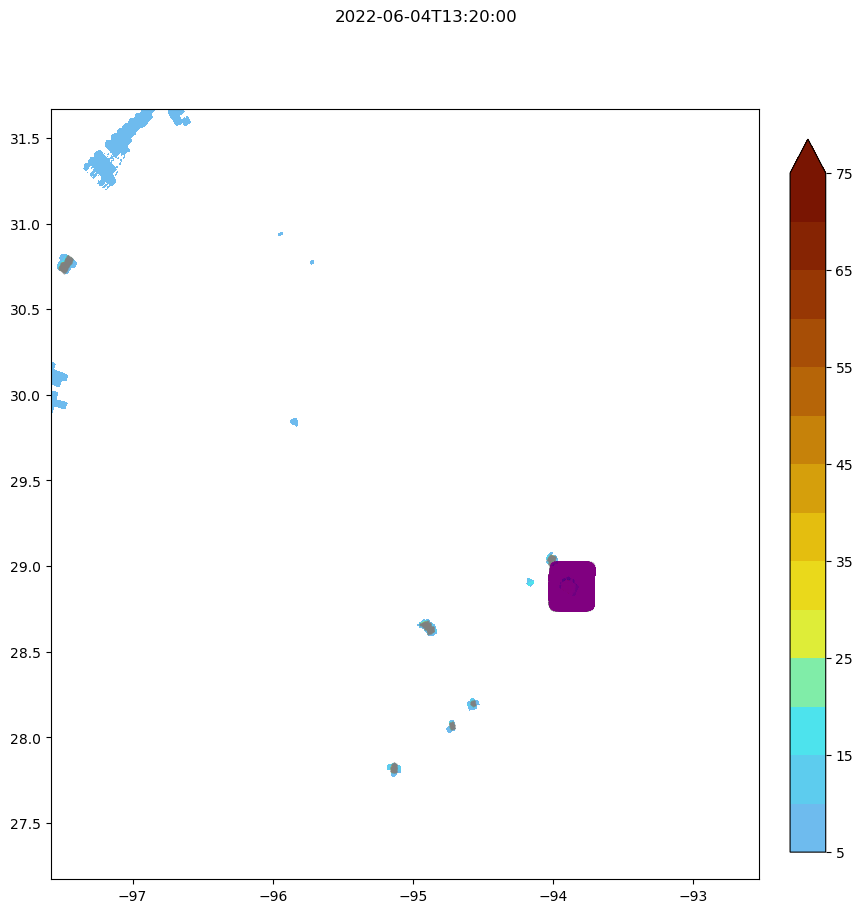

In [450]:
import numpy as np
import pyart
data1 = xr.open_dataset(files[0],decode_times=False)
drop_list = list(np.sort(list(data1.variables)))

good_list = list(flatten(list(('COMDBZ', 'Times','XLAT','XLONG','XTIME','FRZLVL','TPW','LWP','IWP',
                             'CLWP','RWP', 'CIWP','SIWP','GIWP','HIWP','LIGHTDIS','LIGHTDENS',
                              ))))# + (args.add_var,))))
drop_list = [e for e in drop_list if e not in good_list]

import matplotlib.pyplot as plt

# #         import xwrf
# data = xr.open_mfdataset(files[160], engine="netcdf4",parallel=True,
#             concat_dim="Time", combine="nested", chunks={"Time": 1},decode_times=False,
#             drop_variables=drop_list).xwrf.postprocess()


#         # #MAKE THE TIME DIMENSION AND COORDINATES PLAY NICE
# data = data.rename_dims({'Time': 'time'})
# data['time'] = data['Time']
# maxrefl = data['COMDBZ']
# maxrefl = maxrefl.drop('XTIME')
# maxrefl = maxrefl.drop('Time')
j = 0

ref_levels = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75]
# for j in range(len(maxrefl.time)):
date = str(maxrefl['time'][j].values)[:-13]

time_index = 0
fig, ax = plt.subplots(figsize=(10,10))
refl = maxrefl[j,:,:].values
fig.suptitle(str(maxrefl['time'][j].data)[:-10])

# refplt = ax.contourf(data['XLONG'],data['XLAT'], refl, extend = 'max',levels = ref_levels,cmap='pyart_LangRainbow12',origin = 'lower',
            # vmin=-24, vmax=72)#, extent = [-96,-93,28,30])
y_mesh,x_mesh = np.meshgrid(nc_grid['lon'],ncgrid['lat'])
refplt = ax.contourf(y_mesh,x_mesh, maxreflp[0,:,:], extend = 'max',levels = ref_levels,cmap='pyart_LangRainbow12',origin = 'lower', vmin=-24, vmax=72)#,extent = [0,-10000,-20000,-10000])

fig.colorbar(refplt,fraction=0.046, pad=0.04)
j = 162#342
i = np.where(both_ds['segmentation_mask'][j,:,:] >0)

y_mesh,x_mesh = np.meshgrid(nc_grid['lat'],nc_grid['lon'])
    
y, x = y_mesh[i[1],i[0]],x_mesh[i[1],i[0]]

imcell2 = ax.scatter(x,y,s = 1,c = 'gray', marker = '.',alpha = 0.75)

# # from skimage import dilation
from skimage.morphology import disk, dilation
dil = dilation(both_ds['segmentation_mask'][j,:,:], disk(15))
# i = np.where(dil > 0)
i = np.where(dil > 0)
f = 938

# y_mesh,x_mesh = np.meshgrid(nc_grid['lat'],nc_grid['lon'])
# y_mesh = maxrefl['XLAT'].values
# x_mesh = maxrefl['XLONG'].values
# y, x = y_mesh[i[1],i[0]],x_mesh[i[1],i[0]]
# y = nclat[xy[1]]
# x = nclon[xy[0]]
# imcell2 = ax.scatter(y,x,s = 1,c = 'blue', marker = '.',alpha = 0.75)

# xarr = []
# yarr = []
# for k, val in enumarate(y):
# import numpy.ma as ma
# mask  = ma.masked_where(both_ds['segmentation_mask'][frame,:,:] <=0,both_ds['segmentation_mask'][frame,:,:])

# imcell3 = ax.contourf(data['XLONG'][:,:],data['XLAT'][:,:],data['LIGHTDIS'][0,:,:],levels = ref_levels,cmap='pyart_LangRainbow12',origin = 'lower', vmin=-24, vmax=50,alpha = 0.55)

# from skimage.morphology import disk, dilation
# dil = dilation(da['COMDBZ'][0,:,:], disk(3))
# i = np.where(dil > 0)
# imcell3 = ax.plot(da['XLONG'][:,:],da['XLAT'][:,:],color='red',alpha = 0.55)
f = 942
xy = np.where(dilated_features_this_frame == f)

#These are the ncgrid lat lon of the feature f into an array 
arrlat = nclat[xy[1]]
arrlon = nclon[xy[0]]

combined_x_y_arrays = np.dstack(
                    [np.array(arrlon).ravel(), np.array(arrlat).ravel()]
                )[0]

# out = data_crs.transform_points(ccrs.PlateCarree(),arrlat,arrlon)
    
# da = data.sel(x = out[:,0], y = out[:,1],method = "nearest")
        # lon_points = da['XLONG'].values.ravel()
        # lat_points = da['XLAT'].values.ravel()



imcell4 = ax.scatter(da['XLONG'].values.ravel(),da['XLAT'].values.ravel(),color = 'purple',alpha =0.01)
    # da = data.sel(x = out[:,0], y = out[:,1],method = "nearest")
# imcell3 = ax.plot


In [47]:
from scipy import ndimage as ndi
from scipy import spatial
from geopy.distance import geodesic, great_circle
import pandas as pd
ncgrid = pyart.io.read_grid("/home/jovyan/efs/tracer/POLARRIS_GRIDDED/2022060400/VCP12_CfRadial_2022_0605_020221_grid.nc").to_xarray()
nclon = ncgrid['lat'].data #nc_grid["point_longitude"][0, :, :].data
nclat = ncgrid['lon'].data #nc_grid["point_latitude"][0, :, :].data
from skimage.morphology import disk, dilation
feature_FED = dict()
feature_SRC = dict()


time_arr = []
for i in files:
    time_arr.append(pd.to_datetime(i[-19:],format = "%Y-%m-%d_%H:%M:%S"))
time_arr = np.array(time_arr)
nuwrf_df = pd.DataFrame(time_arr, columns=['nuwrf_time'])
# f = 3037
# j = 342 #FOR TESTING

# data_crs = ccrs.LambertConformal(central_longitude=-96.30000305175781,central_latitude = 29.500003814697266)

xrdata = both_ds

track_dBZ_thresh = 30.0
feature_is_bright = (xrdata['max_reflectivity'] > track_dBZ_thresh)
reduced_track_ids = np.unique(xrdata[{'feature':feature_is_bright}].feature_parent_track_id)
traversal = OneToManyTraversal(xrdata, ('track','cell','feature'), ('cell_parent_track_id', 'feature_parent_cell_id'))
xrdata = traversal.reduce_to_entities('track', reduced_track_ids)
print('reduced')
# for num, i in enumerate(np.unique(xrdata["feature_time_index"].values)):
#     if i <161:
#         continue
#     if i > 165:
#         continue
#     print(i)

#     ids = np.where(xrdata["feature_time_index"].values == i)
#     ids = xrdata["feature"].values[ids]
#     features_this_frame = xrdata["segmentation_mask"].data[i, :, :]
#     xrdata['segmentation_mask'][i,:,:]['time'].values
    
#     t1 = pd.to_datetime(xrdata['feature_time_str'][ids].values[0],format = "%Y-%m-%d %H:%M:%S")
#     print(t1)
#     nuwrf_file = np.argmin(abs(nuwrf_df - t1))

#     data = xr.open_mfdataset(files[nuwrf_file], engine="netcdf4",parallel=True,
#             concat_dim="Time", combine="nested", chunks={"Time": 1},decode_times=False,
#             drop_variables=drop_list).xwrf.postprocess()
#     data = data.rename_dims({'Time': 'time'})
#     data['time'] = data['Time']
#     print(data['time'])
     
    
    
    
#     # trimmed_data = data.sel(time=xrdata['segmentation_mask'][i,:,:]['time'].values,method = 'nearest')
#     print(np.nanmax(data['LIGHTDIS'].values))
#     if np.nanmax(data['LIGHTDIS'].values) == 0:
#         print('no ltg in scene1')
#         continue
#     # if np.nanmax(data['LIGHTDENS'].values) == 0:
#     #     print('no ltg in scene1')
#     #     continue
        
#     for nid, f in enumerate(ids):
#         print(f)
#         # if f < 942:
#         #     continue
#         # if f>942:
#         #     continue
#         # this_feature = (features_this_frame == f)
#         dilated_features_this_frame = dilation(xrdata["segmentation_mask"].data[i, :, :], disk(9))
#         xy = np.where(dilated_features_this_frame == f)

# #Check if there are any features in the scene, if the feature exists
#         if len(xy[0]) <= 0:
#             feature_FED[f] = 0
#             feature_SRC[f] = 0
#             print('no features here')
#             continue
# # else:
# # #Get nearest indicy of the nuwrf time to polarris time

#         # trimmed_data['LIGHTDENS'].values

# #Check if there is any lightning in the NUWRF data at the nearest time step

    
#         FED = []
#         SRC = []
#         dist = [] 
#         index = []
# #These are the ncgrid lat lon of the feature f into an array 
#         arrlat = nclat[xy[1]]
#         arrlon = nclon[xy[0]]

#         combined_x_y_arrays = np.dstack(
#                     [np.array(arrlon).ravel(), np.array(arrlat).ravel()]
#                 )[0]
#         kdtree = spatial.KDTree(combined_x_y_arrays)
        
# #These are the NUWRF points to test against the KD tree to find the nearest point:
#         out = data_crs.transform_points(ccrs.PlateCarree(),arrlat,arrlon)
    
#         da = data.sel(x = out[:,0], y = out[:,1],method = "nearest")
#         lon_points = da['XLONG'].values.ravel()
#         lat_points = da['XLAT'].values.ravel()
#         #Test if there are any lightdis or dens vals in the scene
#         if np.nanmax(da['LIGHTDIS']) ==0: 
#             feature_FED[f] = 0
#             feature_SRC[f] = 0
#             print('no ltg in this feature2')
#             # continue
#         else:
#             LGTDIS = da['LIGHTDIS'].values.ravel()
#             LGTDENS = da['LIGHTDENS'].values.ravel()
#             p =list(flatten(np.where(LGTDIS >0)))
#             pp = list(flatten(np.where(LGTDENS >0)))
#             p3 = list(set(p + pp))
#             LGTDIS = LGTDIS[p3]
#             LGTDENS = LGTDENS[p3]
#             lon_points = lon_points[p3]
#             lat_points = lat_points[p3]
#             print('starting point wise comparison')
#             for lp in range(len(lat_points)):
#                 pt = [lat_points[lp], lon_points[lp]]
#                 # pt = [lon_points[lp],lat_points[lp]]
#                 d, inder = kdtree.query(pt)
#                 new_point = combined_x_y_arrays[inder]
#                 index.append(inder)
#                 d = great_circle(pt, new_point).km
#                 dist.append(d)
            
#                 if d > 5:
#                     continue
#                 else: 
#                     FED.append(LGTDENS[lp])
#                     SRC.append(LGTDIS[lp])
#             if (len(FED) > 0):
#                 feature_FED[f] = np.nanmax(FED)
#             else:
#                 feature_FED[f] = 0
#             if (len(SRC) > 0):
#                 feature_SRC[f] = np.nanmax(SRC)
#             else:
#                 feature_SRC[f] = 0


reduced


In [48]:
both_ds

<xarray.Dataset>
Dimensions:                           (feature: 3671, time: 656, y: 1001,
                                       x: 1001, track: 168, cell: 231)
Coordinates:
  * feature                           (feature) int64 1 2 3 4 ... 3669 3670 3671
  * time                              (time) datetime64[ns] 2022-06-04T02:01:...
  * y                                 (y) float64 -2.5e+05 ... 2.5e+05
  * x                                 (x) float64 -2.5e+05 ... 2.5e+05
  * track                             (track) float64 0.0 1.0 ... 166.0 167.0
  * cell                              (cell) int64 -1 1 2 6 ... 817 818 820 822
Data variables: (12/23)
    feature_time_index                (feature) int64 ...
    feature_id_this_frame             (feature) int64 ...
    feature_hdim1_coordinate          (feature) float64 ...
    feature_hdim2_coordinate          (feature) float64 ...
    feature_grid_cell_count           (feature) int64 ...
    feature_threshold_max             (feature) float64 ...
    ...                                ...
    track_child_cell_count            (track) float64 ...
    cell_child_feature_count          (cell) float64 ...
    feature_nearby_count_5km          (feature) int64 ...
    feature_nearby_count_10km         (feature) int64 ...
    feature_nearby_count_15km         (feature) int64 ...
    feature_nearby_count_20km         (feature) int64 ...

In [6]:
xrdata = xr.open_dataset("/home/jovyan/efs/tracer/TOBAC_POLARRIS/POLARRIS_tobac_Save_20220618/Track_features_merges.nc")
print(xrdata)
track_dBZ_thresh = 35.0
feature_is_bright = (xrdata['max_reflectivity'] > track_dBZ_thresh)
reduced_track_ids = np.unique(xrdata[{'feature':feature_is_bright}].feature_parent_track_id)
traversal = OneToManyTraversal(xrdata, ('track','cell','feature'), ('cell_parent_track_id', 'feature_parent_cell_id'))
xrdata = traversal.reduce_to_entities('track', reduced_track_ids)
print('reduced')

<xarray.Dataset>
Dimensions:                           (feature: 5149, time: 532, y: 1001,
                                       x: 1001, track: 245, cell: 292)
Coordinates:
  * feature                           (feature) int64 1 2 3 4 ... 5147 5148 5149
  * time                              (time) datetime64[ns] 2022-06-18T00:16:...
  * y                                 (y) float64 -2.5e+05 ... 2.5e+05
  * x                                 (x) float64 -2.5e+05 ... 2.5e+05
  * track                             (track) float64 0.0 1.0 ... 243.0 244.0
  * cell                              (cell) int64 -1 1 2 3 ... 757 761 766 767
Data variables: (12/23)
    feature_time_index                (feature) int64 ...
    feature_id_this_frame             (feature) int64 ...
    feature_hdim1_coordinate          (feature) float64 ...
    feature_hdim2_coordinate          (feature) float64 ...
    feature_grid_cell_count           (feature) int64 ...
    feature_threshold_max             (featur

In [5]:
xrdata#['time'].values[74]

<xarray.Dataset>
Dimensions:                           (feature: 4795, time: 665, y: 1001,
                                       x: 1001, track: 231, cell: 325)
Coordinates:
  * feature                           (feature) int64 1 2 3 4 ... 6434 6456 6482
  * time                              (time) datetime64[ns] 2022-06-16T00:33:...
  * y                                 (y) float64 -2.5e+05 ... 2.5e+05
  * x                                 (x) float64 -2.5e+05 ... 2.5e+05
  * track                             (track) float64 1.0 2.0 ... 280.0 281.0
  * cell                              (cell) int64 1 9 11 10 ... 964 982 984 987
Data variables: (12/23)
    feature_time_index                (feature) int64 ...
    feature_id_this_frame             (feature) int64 ...
    feature_hdim1_coordinate          (feature) float64 ...
    feature_hdim2_coordinate          (feature) float64 ...
    feature_grid_cell_count           (feature) int64 ...
    feature_threshold_max             (feature) float64 ...
    ...                                ...
    track_child_cell_count            (track) float64 ...
    cell_child_feature_count          (cell) float64 ...
    feature_nearby_count_5km          (feature) int64 ...
    feature_nearby_count_10km         (feature) int64 ...
    feature_nearby_count_15km         (feature) int64 ...
    feature_nearby_count_20km         (feature) int64 ...

In [49]:
xrdata

<xarray.Dataset>
Dimensions:                      (track: 7, cell: 16, feature: 282)
Coordinates:
  * track                        (track) float64 0.0 1.0 2.0 3.0 6.0 7.0 10.0
  * cell                         (cell) int64 -1 42 5 12 13 7 ... 29 24 32 35 36
  * feature                      (feature) int64 1 2 3 4 5 ... 283 284 285 286
Data variables: (12/19)
    feature_area                 (feature) float64 ...
    feature_maxrefl              (feature) float64 ...
    feature_zdrvol               (feature) float64 ...
    feature_kdpvol               (feature) float64 ...
    feature_rhvdeficitvol        (feature) float64 ...
    feature_zdrcol               (feature) float32 ...
    ...                           ...
    feature_rhvdeficitcol_total  (feature) float32 ...
    feature_zdrwt_total          (feature) float64 ...
    feature_kdpwt_total          (feature) float64 ...
    feature_rhvdeficitwt_total   (feature) float64 ...
    feature_SRC                  (feature) int64 ...
    feature_FED                  (feature) int64 ...

In [102]:
files = sorted(glob("/home/jovyan/efs/tracer/NUWRF/2022060200/wrf2dout_d02*"))

In [103]:
len(files)

577

In [114]:
a = xr.open_dataset(files[200],decode_times=False)

In [9]:
a=xr.open_dataset("/home/jovyan/efs/tracer/TOBAC_POLARRIS/POLARRIS_tobac_Save_20220622/timeseries_data_polarris.nc")

In [10]:
a

<xarray.Dataset>
Dimensions:                      (track: 213, cell: 263, feature: 4168)
Coordinates:
  * track                        (track) float64 1.0 2.0 3.0 ... 249.0 251.0
  * cell                         (cell) int64 1 2 8 3 4 ... 662 663 678 680 688
  * feature                      (feature) int64 1 2 3 4 ... 5119 5130 5140 5153
Data variables: (12/19)
    feature_area                 (feature) float64 ...
    feature_maxrefl              (feature) float64 ...
    feature_zdrvol               (feature) float64 ...
    feature_kdpvol               (feature) float64 ...
    feature_rhvdeficitvol        (feature) float64 ...
    feature_zdrcol               (feature) float32 ...
    ...                           ...
    feature_rhvdeficitcol_total  (feature) float32 ...
    feature_zdrwt_total          (feature) float64 ...
    feature_kdpwt_total          (feature) float64 ...
    feature_rhvdeficitwt_total   (feature) float64 ...
    feature_SRC                  (feature) int64 ...
    feature_FED                  (feature) float64 ...

In [1]:
import pyart
from scipy import ndimage as ndi
from scipy import spatial
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from geopy.distance import geodesic, great_circle
import os
import xarray as xr
import numpy as np
from glob import glob
from scipy.interpolate import griddata
from pandas.core.common import flatten
import warnings
from skimage.morphology import disk, dilation
from pyxlma.lmalib.traversal import OneToManyTraversal
import xwrf
import pandas as pd
warnings.filterwarnings("ignore", category=UserWarning, append=True)
warnings.filterwarnings("ignore", category=RuntimeWarning, append=True)
warnings.filterwarnings("ignore", category=FutureWarning, append=True)
warnings.filterwarnings("ignore", category=pd.io.pytables.PerformanceWarning)
import time




## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [44]:
files = sorted(glob("/home/jovyan/efs/tracer/NUWRF/2022060400/" + "wrf2dout_d02_*"))
# files = files#[0:5]
time_arr = []
for i in files:
    time_arr.append(pd.to_datetime(i[-19:],format = "%Y-%m-%d_%H:%M:%S"))
time_arr = np.array(time_arr)
nuwrf_df = pd.DataFrame(time_arr, columns=['nuwrf_time'])

data1 = xr.open_dataset(files[0],decode_times=False)
drop_list = list(np.sort(list(data1.variables)))
good_list = list(flatten(list(('COMDBZ', 'Times','XLAT','XLONG','XTIME','FRZLVL','TPW','LWP','IWP',
                             'CLWP','RWP', 'CIWP','SIWP','GIWP','HIWP','LIGHTDIS','LIGHTDENS',
                              ))))# + (args.add_var,))))
drop_list = [e for e in drop_list if e not in good_list]


# data = xr.open_mfdataset(files[0],concat_dim="Time",combine="nested",chunks={"Time": 1},
#                              drop_variables=drop_list,decode_times=False,).xwrf.postprocess()

#     #MAKE THE TIME DIMENSION AND COORDINATES PLAY NICE
# data = data.rename_dims({'Time': 'time'})
# data['time'] = data['Time']
    
    # Read in feature information
savedir = "/home/jovyan/efs/tracer/TOBAC_NUWRF/forecast_runs/NUWRF_tobac_Save_20220604/"
xrdata = xr.open_dataset(savedir + "Track_features_merges.nc")
    
# Remove all tracks that don't reach 35 dBZ (or whatever thresh we set below)
track_dBZ_thresh = 30.0
feature_is_bright = (xrdata['max_reflectivity'] > track_dBZ_thresh)
reduced_track_ids = np.unique(xrdata[{'feature':feature_is_bright}].feature_parent_track_id)
traversal = OneToManyTraversal(xrdata, ('track','cell','feature'), ('cell_parent_track_id', 'feature_parent_cell_id'))
xrdata = traversal.reduce_to_entities('track', reduced_track_ids)
print('reduced')
    
ref = 10
# deltaz = pdata["z"][1:].values - pdata["z"][:-1].values

# dz = np.abs(np.mean(deltaz)) / 1000
dxy = data1.DX / 1000.0
dt = 5.0 #data1.DT
print("Mean spacing of data in x:", dxy)

# grid_box_vol = dz * dxy * dxy

val = pd.to_datetime(xrdata["time"].values)

feature_SRC = dict()
feature_FED = dict()
feature_TWP_max = dict()
feature_LWP_max = dict()
feature_IWP_max = dict()
feature_CLWP_max = dict()
feature_RWP_max = dict()
feature_CIWP_max = dict()
feature_SIWP_max = dict()
feature_GIWP_max = dict()
feature_HIWP_max = dict()
feature_TPW_mean = dict()
feature_LWP_mean = dict()
feature_IWP_mean = dict()
feature_CLWP_mean = dict()
feature_RWP_mean = dict()
feature_CIWP_mean = dict()
feature_SIWP_mean = dict()
feature_GIWP_mean = dict()
feature_HIWP_mean = dict()
feature_TPW_mean_all = dict()
feature_LWP_mean_all = dict()
feature_IWP_mean_all = dict()
feature_CLWP_mean_all = dict()
feature_RWP_mean_all = dict()
feature_CIWP_mean_all = dict()
feature_SIWP_mean_all = dict()
feature_GIWP_mean_all = dict()
feature_HIWP_mean_all = dict()

# x_mesh,z_mesh,y_mesh = np.meshgrid(data['x'],data['z'],data['y'])
rhgt = (np.array(
            [
                0,
                0.5,
                1,
                1.5,
                2,
                2.5,
                3,
                3.5,
                4,
                4.5,
                5,
                5.5,
                6,
                6.5,
                7,
                7.5,
                8,
                8.5,
                9,
                9.5,
                10,
                10.5,
                11,
                11.5,
                12,
                12.5,
                13,
                13.5,
                14,
                14.5,
                15,
            ]
        )
        * 1000.0
    )


#     # del pdata
# start = time.time()
     
print(np.nanmax(np.unique(xrdata["feature_time_index"].values)))
print(np.nanmax(xrdata["feature"].values))
    
# # tracemalloc.start()
for num, i in enumerate(np.unique(xrdata["feature_time_index"].values)):

    print(i)

    ids = np.where(xrdata["feature_time_index"].values == i)
    ids = xrdata["feature"].values[ids]
    features_this_frame = xrdata["segmentation_mask"].data[i, :, :]
    
    t1 = pd.to_datetime(xrdata['time'][i].values)
#         print(t1)
    nuwrf_file = np.argmin(abs(nuwrf_df - t1))

    nudata = xr.open_dataset(files[nuwrf_file], engine="netcdf4",decode_times=False,
            drop_variables=drop_list).xwrf.postprocess()
    nudata = nudata.rename_dims({'Time': 'time'})
    nudata['time'] = nudata['Time']
    print(nudata['time'].values)
    # Find the index in rhgt that correponds to the melting level given in the command line
       
    for nid, f in enumerate(ids):
        print(f)
        this_feature = (features_this_frame == f)

        feature_TPW_max[f] = nudata['TPW'][0,:,:].where(this_feature, other = 0.0).max().values
        feature_TPW_mean[f] = nudata['TPW'][0,:,:].where(this_feature, other = float('nan')).mean().values
        feature_TPW_mean_all[f] = nudata['TPW'][0,:,:].where(this_feature, other = 0.0).mean().values
        
        feature_LWP_max[f] = nudata['LWP'][0,:,:].where(this_feature, other = 0.0).max().values
        feature_LWP_mean[f] = nudata['LWP'][0,:,:].where(this_feature, other = float('nan')).mean().values
        feature_LWP_mean_all[f] = nudata['LWP'][0,:,:].where(this_feature, other = 0.0).mean().values
        
        feature_IWP_max[f] = nudata['IWP'][0,:,:].where(this_feature, other = 0.0).max().values
        feature_IWP_mean[f] = nudata['IWP'][0,:,:].where(this_feature, other = float('nan')).mean().values
        feature_IWP_mean_all[f] = nudata['IWP'][0,:,:].where(this_feature, other = 0.0).mean().values
        
        feature_CLWP_max[f] = nudata['CLWP'][0,:,:].where(this_feature, other = 0.0).max().values
        feature_CLWP_mean[f] = nudata['CLWP'][0,:,:].where(this_feature, other = float('nan')).mean().values
        feature_CLWP_mean_all[f] = nudata['CLWP'][0,:,:].where(this_feature, other = 0.0).mean().values
        
        feature_RWP_max[f] = nudata['RWP'][0,:,:].where(this_feature, other = 0.0).max().values
        feature_RWP_mean[f] = nudata['RWP'][0,:,:].where(this_feature, other = float('nan')).mean().values
        feature_RWP_mean_all[f] = nudata['RWP'][0,:,:].where(this_feature, other = 0.0).mean().values
        
        feature_CIWP_max[f] = nudata['CIWP'][0,:,:].where(this_feature, other = 0.0).max().values
        feature_CIWP_mean[f] = nudata['CIWP'][0,:,:].where(this_feature, other = float('nan')).mean().values
        feature_CIWP_mean_all[f] = nudata['CIWP'][0,:,:].where(this_feature, other = 0.0).mean().values
        
        feature_SIWP_max[f] = nudata['SIWP'][0,:,:].where(this_feature, other = 0.0).max().values
        feature_SIWP_mean[f] = nudata['SIWP'][0,:,:].where(this_feature, other = float('nan')).mean().values
        feature_SIWP_mean_all[f] = nudata['SIWP'][0,:,:].where(this_feature, other = 0.0).mean().values
        
        feature_GIWP_max[f] = nudata['GIWP'][0,:,:].where(this_feature, other = 0.0).max().values
        feature_GIWP_mean[f] = nudata['GIWP'][0,:,:].where(this_feature, other = float('nan')).mean().values
        feature_GIWP_mean_all[f] = nudata['GIWP'][0,:,:].where(this_feature, other = 0.0).mean().values
        
        feature_HIWP_max[f] = nudata['HIWP'][0,:,:].where(this_feature, other = 0.0).max().values
        feature_HIWP_mean[f] = nudata['HIWP'][0,:,:].where(this_feature, other = float('nan')).mean().values
        feature_HIWP_mean_all[f] = nudata['HIWP'][0,:,:].where(this_feature, other = 0.0).mean().values
# 
        feature_FED[f] = nudata['LIGHTDENS'][0,:,:].where(this_feature, other = 0.0).max().values
        feature_SRC[f] = nudata['LIGHTDIS'][0,:,:].where(this_feature, other = 0.0).max().values
    print("Cleaning memory")
        # del kdpvol, zdrvol, kdpcol, zdrcol
        # gc.collect()

reduced
Mean spacing of data in x: 1.0
507
5324
13
['2022-06-04T01:05:00.000000000']
1
Cleaning memory
14
['2022-06-04T01:10:00.000000000']
2
Cleaning memory
15
['2022-06-04T01:15:00.000000000']
3
Cleaning memory
16
['2022-06-04T01:20:00.000000000']
4
Cleaning memory
17
['2022-06-04T01:25:00.000000000']
5
Cleaning memory
18
['2022-06-04T01:30:00.000000000']
6
Cleaning memory
19
['2022-06-04T01:35:00.000000000']
7
Cleaning memory
20
['2022-06-04T01:40:00.000000000']
8
Cleaning memory
21
['2022-06-04T01:45:00.000000000']
9
Cleaning memory
22
['2022-06-04T01:50:00.000000000']
10
Cleaning memory
23
['2022-06-04T01:55:00.000000000']
11
Cleaning memory
24
['2022-06-04T02:00:00.000000000']
14
15
Cleaning memory
25
['2022-06-04T02:05:00.000000000']
19
24
22
Cleaning memory
26
['2022-06-04T02:10:00.000000000']
31
37
34
33
Cleaning memory
27
['2022-06-04T02:15:00.000000000']
43
48
45
44
Cleaning memory
28
['2022-06-04T02:20:00.000000000']
54
63
57
55
61
Cleaning memory
29
['2022-06-04T02:25:00.0

KeyboardInterrupt: 

In [2]:
#Graph to process and make the duration, number of cells/features, maximum reflectivity, maximum area graphs
#This is comparing nexrad, nuwrf, and POLARRIS
import xarray as xr
import numpy as np
import pandas as pd
#Read in data for each date and process values
# num_cellsNE = []
# num_tracksNE = []
# num_featuresNE = []
# max_reflNE = []
# max_areaNE = []#
# mean_areaNE = []#
# durationNE = [] #
# neighbor5km_NE = []
# neighbor10km_NE = []
# neighbor15km_NE = []
# neighbor20km_NE = []

# num_cellsNU = []
# num_tracksNU = []
# num_featuresNU = []
# max_reflNU = []
# max_areaNU = []
# mean_areaNU = []
# durationNU = []
# neighbor5km_NU = []
# neighbor10km_NU = []
# neighbor15km_NU = []
# neighbor20km_NU = []


num_cellsP = []
num_tracksP = []
num_featuresP = []
max_reflP = []
max_areaP = []
mean_areaP = []
durationP = []
neighbor5km_P = []
neighbor10km_P = []
neighbor15km_P = []
neighbor20km_P = []

#NEXRAD datasest
# dates = ["20220601","20220602","20220603","20220604","20220605","20220606","20220607","20220608","20220609",
#          "20220610","20220611","20220612","20220613","20220614","20220615","20220616","20220617","20220618",
#          "20220619","20220620","20220622","20220623","20220626","20220627",
#          "20220628","20220629","20220630","20220702","20220706",
#          "20220712","20220713","20220714","20220728","20220729","20220801","20220802",
#          "20220803","20220806","20220807","20220808","20220813",
#          "20220821","20220825","20220827",
#          "20220831","20220901","20220915","20220916",
#          "20220917"]

#NUWRF dataset
# dates = ["20220601","20220602","20220603","20220604","20220605","20220606","20220607","20220608","20220609",
#          "20220610","20220611","20220612","20220613","20220614","20220615","20220616","20220617","20220618",
#          "20220619","20220620","20220621","20220622","20220623","20220624","20220625","20220626","20220627",
#          "20220628","20220629","20220630","20220701","20220702","20220703","20220704","20220705","20220706",
#          "20220707","20220708","20220709","20220710","20220711","20220712","20220713","20220714","20220715",
#          "20220716","20220717","20220718","20220719","20220720","20220721","20220722","20220723","20220724",
#          "20220725","20220726","20220727","20220728","20220729","20220730","20220731","20220801","20220802",
#          "20220803","20220804","20220805","20220806","20220807","20220808","20220809","20220810","20220811",
#          "20220812","20220813","20220814","20220815","20220816","20220817","20220818","20220819","20220820",
#          "20220821","20220822","20220823","20220824","20220825","20220826","20220827","20220828","20220828",
#          "20220830","20220831","20220901","20220902","20220903","20220904","20220905","20220906","20220907",
#          "20220908","20220909","20220910","20220911","20220912","20220913","20220914","20220915","20220916",
#          "20220917","20220918","20220919","20220920","20220921","20220922","20220923","20220924","20220925",
#          "20220926","20220927","20220928"]

# #POLARRIS dataset
dates = ["20220601","20220602","20220603","20220604","20220605","20220606","20220607","20220608","20220609",
         "20220610","20220611","20220612","20220613","20220614","20220615","20220616","20220617","20220618",
         "20220619","20220620","20220621","20220622","20220623","20220624","20220625","20220626","20220627",
         "20220628","20220629","20220630","20220701","20220702","20220703","20220704","20220705","20220706",
         "20220707","20220708","20220709","20220710","20220711","20220712","20220713","20220714","20220715",
         "20220716","20220717","20220718","20220719","20220720","20220721","20220722","20220723","20220724",
         "20220725","20220726","20220727","20220728","20220729","20220730","20220731","20220801","20220802",
         "20220803","20220804","20220805","20220807","20220808","20220809","20220810","20220811","20220812",
         "20220813","20220814","20220816","20220817","20220819","20220820",
         "20220821","20220822","20220823","20220824","20220825","20220826","20220827","20220828","20220829",
         "20220830","20220831","20220901","20220902","20220903","20220904","20220905","20220906","20220907",
         "20220908","20220909","20220910","20220911","20220912","20220913","20220914","20220915","20220916",
         "20220917","20220918","20220919","20220920","20220921","20220922","20220923","20220924","20220925",
         "20220926","20220927"]
         


for k, day in enumerate(dates):
    print(day)
    # xrdata = xr.open_dataset("/home/jovyan/efs/tracer/NEXRAD/tobac_Save_"+day+"/Track_features_merges.nc")
    xrdata = xr.open_dataset("/home/jovyan/efs/tracer/TOBAC_POLARRIS/POLARRIS_tobac_Save_"+day+"/Track_features_merges.nc")

    # xrdata = xr.open_dataset("/home/jovyan/efs/tracer/TOBAC_NUWRF/forecast_runs/NUWRF_tobac_Save_"+day+"/Track_features_merges.nc")

    
             #get track duration
    first_DOY = pd.to_datetime(xrdata['feature_time'][1].values).day_of_year
    print(first_DOY)
    # for val, j in enumerate(xrdata['track'].values):
    #     i = np.where(xrdata['feature_parent_track_id'] == j)
    #     if len(i[0]) > 0:
    #         # print(np.mean(pd.to_datetime(xrdata['feature_time'].values).day_of_year[i]))
    #         if np.mean(pd.to_datetime(xrdata['feature_time'].values).day_of_year[i]) <=first_DOY:
    #             # print(j)
    #             # xrdata['feature_time'][i].values
    #             durationNU.append((np.nanmax(xrdata['feature_time'][i].values) - np.nanmin(xrdata['feature_time'][i].values))/ np.timedelta64(1, 'm'))
    #             max_areaNU.append((np.nanmax(xrdata['feature_area'][i].values)))
    #             mean_areaNU.append((np.nanmean(xrdata['feature_area'][i].values)))
    #             num_featuresNU.append(len(i[0]))
    #             max_reflNU.append(np.nanmean(xrdata['max_reflectivity'][i].values))
    #             neighbor5km_NU.append(np.nanmean(xrdata['feature_nearby_count_5km'][i].values))
    #             neighbor10km_NU.append(np.nanmean(xrdata['feature_nearby_count_10km'][i].values))
    #             neighbor15km_NU.append(np.nanmean(xrdata['feature_nearby_count_15km'][i].values))
    #             neighbor20km_NU.append(np.nanmean(xrdata['feature_nearby_count_20km'][i].values))
    #             num_cellsNU.append(len(np.unique(xrdata['feature_parent_cell_id'][i].values)))
    #         else:
    #             continue
    #     else:
    #         continue
#          #get track duration
    first_DOY = pd.to_datetime(xrdata['feature_time'][1].values).day_of_year
    for val, j in enumerate(xrdata['track'].values):
        i = np.where(xrdata['feature_parent_track_id'] == j)
        if len(i[0]) > 0:
            if np.mean(pd.to_datetime(xrdata['feature_time'].values).day_of_year[i]) <=first_DOY:
                
                xrdata['feature_time'][i].values
                durationP.append((np.nanmax(xrdata['feature_time'][i].values) - np.nanmin(xrdata['feature_time'][i].values))/ np.timedelta64(1, 'm'))
                max_areaP.append((np.nanmax(xrdata['feature_area'][i].values)))
                mean_areaP.append((np.nanmean(xrdata['feature_area'][i].values)))
                num_featuresP.append(len(i[0]))
                max_reflP.append(np.nanmean(xrdata['max_reflectivity'][i].values))
                neighbor5km_P.append(np.nanmean(xrdata['feature_nearby_count_5km'][i].values))
                neighbor10km_P.append(np.nanmean(xrdata['feature_nearby_count_10km'][i].values))
                neighbor15km_P.append(np.nanmean(xrdata['feature_nearby_count_15km'][i].values))
                neighbor20km_P.append(np.nanmean(xrdata['feature_nearby_count_20km'][i].values))
                num_cellsP.append(len(np.unique(xrdata['feature_parent_cell_id'][i].values)))
            else:
                continue
        else:
            continue
        
        
    # #get track duration
    # for val, j in enumerate(xrdata['track'].values):
    #     i = np.where(xrdata['feature_parent_track_id'] == j)
    #     if len(i[0]) > 0:
    #         xrdata['feature_time'][i].values
    #         durationNE.append((np.nanmax(xrdata['feature_time'][i].values) - np.nanmin(xrdata['feature_time'][i].values))/ np.timedelta64(1, 'm'))
    #         max_areaNE.append((np.nanmax(xrdata['feature_area'][i].values)))
    #         mean_areaNE.append((np.nanmean(xrdata['feature_area'][i].values)))
    #         num_featuresNE.append(len(i[0]))
    #         max_reflNE.append(np.nanmean(xrdata['max_reflectivity'][i].values))
    #        # neighbor5km_NE.append(np.nanmean(xrdata['feature_nearby_count_5km'][i].values))
    #        # neighbor10km_NE.append(np.nanmean(xrdata['feature_nearby_count_10km'][i].values))
    #        # neighbor15km_NE.append(np.nanmean(xrdata['feature_nearby_count_15km'][i].values))
    #        # neighbor20km_NE.append(np.nanmean(xrdata['feature_nearby_count_20km'][i].values))
    #         num_cellsNE.append(len(np.unique(xrdata['feature_parent_cell_id'][i].values)))
    #     else:
    #         continue

        
        
        

20220601
152
20220602
153
20220603
154
20220604
155
20220605
156
20220606
157
20220607
159
20220608
159
20220609
160
20220610
161
20220611
162
20220612
163
20220613
165
20220614
165
20220615
166
20220616
167
20220617
168
20220618
169
20220619
170
20220620
171
20220621
172
20220622
173
20220623
174
20220624
175
20220625
177
20220626
177
20220627
178
20220628
179
20220629
180
20220630
181
20220701
182
20220702
183
20220703
184
20220704
185
20220705
186
20220706
187
20220707
188
20220708
189
20220709
190
20220710
191
20220711
192
20220712
193
20220713
194
20220714
195
20220715
196
20220716
197
20220717
198
20220718
199
20220719
200
20220720
201
20220721
202
20220722
203
20220723
204
20220724
205
20220725
206
20220726
207
20220727
208
20220728
209
20220729
210
20220730
211
20220731
212
20220801
213
20220802
214
20220803
215
20220804
216
20220805
217
20220807
219
20220808
220
20220809
221
20220810
222
20220811
223
20220812
224
20220813
225
20220814
226
20220816
228
20220817
229
20220819
231

In [21]:
import xarray as xr
xr.open_dataset("/home/jovyan/efs/tracer/NEXRAD/tobac_Save_20220915/Track_features_merges.nc")

<xarray.Dataset>
Dimensions:                           (feature: 31132, time: 291, y: 1001,
                                       x: 1001, track: 1366, cell: 1618)
Coordinates:
  * feature                           (feature) int64 1 2 3 ... 31131 31132
  * time                              (time) datetime64[ns] 2022-09-15T00:02:...
  * y                                 (y) float64 -2.5e+05 ... 2.5e+05
  * x                                 (x) float64 -2.5e+05 ... 2.5e+05
  * track                             (track) float64 0.0 1.0 ... 1.365e+03
  * cell                              (cell) int64 -1 1 2 ... 11989 12006 12015
Data variables: (12/19)
    feature_time_index                (feature) int64 ...
    feature_id_this_frame             (feature) int64 ...
    feature_hdim1_coordinate          (feature) float64 ...
    feature_hdim2_coordinate          (feature) float64 ...
    feature_grid_cell_count           (feature) int64 ...
    feature_threshold_max             (feature) float64 ...
    ...                                ...
    feature_parent_cell_elapsed_time  (feature) timedelta64[ns] ...
    segmentation_mask                 (time, y, x) int32 ...
    cell_parent_track_id              (cell) float64 ...
    feature_parent_track_id           (feature) float64 ...
    track_child_cell_count            (track) float64 ...
    cell_child_feature_count          (cell) float64 ...

In [ ]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:36445")
client

In [ ]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:36445")
client

In [ ]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:36445")
client

In [ ]:
#!/usr/bin/env python
# coding: utf-8

# MODIFIED 
# 20230502: KNB
# 20230630: ECB
#20231206: KNB

# python /home/jovyan/efs/Jupyter_NBs/TRACER-PAWS-NEXRAD-LMA/scripts/Analysis/ecb_tobac_timseriesPOLARRIS2.py \
polarrispath='/home/jovyan/efs/tracer/POLARRIS_GRIDDED/2022060200/'
nuwrfpath='/home/jovyan/efs/tracer/NUWRF/2022060200/'
tobacpath='/home/jovyan/efs/tracer/TOBAC_POLARRIS/POLARRIS_tobac_Save_20220602/'
type="POLARRIS"


import linecache
import os
# import tracemalloc
# import xarray as xr
# End parsing #

# Import packages

import numpy as np
import warnings
import xarray as xr
import random
from scipy import ndimage
from datetime import datetime
import cartopy.crs as ccrs
try:
    import pyproj

    _PYPROJ_AVAILABLE = True
except ImportError:
    _PYPROJ_AVAILABLE = False


# VERSION FOR EACH FEATURE AND CELL IN XARRAY DATASET

import heapq
import gc
import tracemalloc
from matplotlib import cm

from glob import glob
import pandas as pd
from netCDF4 import Dataset

import pyart
from scipy import ndimage as ndi
from scipy import spatial
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from geopy.distance import geodesic, great_circle
import os
from scipy.interpolate import griddata
from pandas.core.common import flatten
import warnings
from skimage.morphology import disk, dilation
from pyxlma.lmalib.traversal import OneToManyTraversal
import xwrf
warnings.filterwarnings("ignore", category=UserWarning, append=True)
warnings.filterwarnings("ignore", category=RuntimeWarning, append=True)
warnings.filterwarnings("ignore", category=FutureWarning, append=True)
warnings.filterwarnings("ignore", category=pd.io.pytables.PerformanceWarning)
import time




###LOAD DATA
#load reference lat lon grid for polarris data
ncgrid = pyart.io.read_grid("/home/jovyan/efs/tracer/POLARRIS_GRIDDED/2022060400/VCP12_CfRadial_2022_0605_020221_grid.nc").to_xarray()
nclon = ncgrid['lat'].data
nclat = ncgrid['lon'].data 

files = sorted(glob(nuwrfpath + "wrf2dout_d02_*"))
time_arr = []
for i in files:
    time_arr.append(pd.to_datetime(i[-19:],format = "%Y-%m-%d_%H:%M:%S"))
time_arr = np.array(time_arr)
nuwrf_df = pd.DataFrame(time_arr, columns=['nuwrf_time'])
data_crs = ccrs.LambertConformal(central_longitude=-96.30000305175781,central_latitude = 29.500003814697266)

data1 = xr.open_dataset(files[0],decode_times=False)
drop_list = list(np.sort(list(data1.variables)))
good_list = list(flatten(list(('COMDBZ', 'Times','XLAT','XLONG','XTIME','FRZLVL','TPW','LWP','IWP',
                             'CLWP','RWP', 'CIWP','SIWP','GIWP','HIWP','LIGHTDIS','LIGHTDENS',
                              ))))# + (args.add_var,))))
drop_list = [e for e in drop_list if e not in good_list] 
    
# Read in feature information
savedir = tobacpath
xrdata = xr.open_dataset(savedir + "Track_features_merges.nc")
    
# Remove all tracks that don't reach 35 dBZ (or whatever thresh we set below)
track_dBZ_thresh = 35.0
feature_is_bright = (xrdata['max_reflectivity'] > track_dBZ_thresh)
reduced_track_ids = np.unique(xrdata[{'feature':feature_is_bright}].feature_parent_track_id)
traversal = OneToManyTraversal(xrdata, ('track','cell','feature'), ('cell_parent_track_id', 'feature_parent_cell_id'))
xrdata = traversal.reduce_to_entities('track', reduced_track_ids)
    
    
track_time_thresh1 = 325
track_time_thresh2 = 400
feature_is_bright = np.logical_and((xrdata['feature_time_index'] <= track_time_thresh2),(xrdata['feature_time_index'] > track_time_thresh1))

# feature_is_bright = ((xrdata['feature_time_index'] < track_time_thresh2) & (xrdata['feature_time_index'] >= track_time_thresh1))
reduced_track_ids = np.unique(xrdata[{'feature':feature_is_bright}].feature_parent_track_id)
traversal = OneToManyTraversal(xrdata, ('track','cell','feature'), ('cell_parent_track_id', 'feature_parent_cell_id'))
xrdata = traversal.reduce_to_entities('track', reduced_track_ids)
print('reduced')
  
#load in polarris data
polpath = polarrispath + "*_grid.nc"

pdata = xr.open_mfdataset(polpath,engine="netcdf4", combine="nested",  concat_dim="time")
pdata["time"].encoding["units"] = "seconds since 2000-01-01 00:00:00"
pfiles = sorted(glob(polpath))
arr = []
for i in pfiles:
    arr.append(pd.to_datetime(i[-24:-8],format = "%Y_%m%d_%H%M%S"))
arr = pd.DatetimeIndex(arr)
pdata = pdata.assign_coords(time=arr)
    # nc_grid = load_cfradial_grids(path)
    # nclon = nc_grid["point_longitude"][0, :, :].data
    # nclat = nc_grid["point_latitude"][0, :, :].data

ref = 10
rhv = 0.9
rhv_col_thresh = 0.98
kdp_min = 0.75
zdr_min = 1.0
    # This is the qc'd version of KDP and ZDR above threshold *regardless* of frame. It is computed lazily, so no penalty for doing it over the whole dataset.
    #20230502: we have decided to not QC the ZDR/KDP in order to not remove areas where a KDP column is present with low Rho_hv values. 
    #radar_good = (data["cross_correlation_ratio"] >= rhv) & (
    #    data["reflectivity"] >= ref
    #)
    # 20230630 Add back in threshold on large reflectivity values to ensure no spurious values at cloud edge in low SNR.
    # Even if the 2D features are thresholdled on 15 dBZ, the actual 3D grids within those features can have
    # low reflectivity at cloud top.
zh_large = (pdata["CZ"] >= ref)
    
kdp_large = (pdata["KD"] >= kdp_min)
kdp_qc = pdata["KD"].where(kdp_large & zh_large)
zdr_large = (pdata["DR"] >= zdr_min)
zdr_qc = pdata["DR"].where(zdr_large & zh_large)
# June 30 2023: add RHV deficit. Deficit is the value below 1.0 of any values below the chosen threshold.
# Guarantees positive values since we ensure we only use pixels with values less than 1.0.
rhv_small = (pdata["RH"] <= rhv_col_thresh)
rhv_deficit_qc = (1.0 - pdata["RH"]).where(zh_large & rhv_small)

deltax = pdata["x"][1:].values - pdata["x"][:-1].values
deltaz = pdata["z"][1:].values - pdata["z"][:-1].values
dxy = np.abs(np.mean(deltax)) / 1000
dz = np.abs(np.mean(deltaz)) / 1000
print("Mean spacing of data in x:", dxy)
print("Mean spacing of data in z:", dz)
grid_box_vol = dz * dxy * dxy

#val = pd.to_datetime(xrdata["time"].values)

feature_zdrvol = dict()
feature_kdpvol = dict()
feature_rhvdeficitvol = dict()
# flash_count_arr = dict()
feature_SRC = dict()
feature_FED = dict()
feature_zdrcol_max = dict()
feature_kdpcol_max = dict()
feature_rhvdeficitcol_max = dict()
feature_zdrcol_mean = dict()
feature_kdpcol_mean = dict()
feature_rhvdeficitcol_mean = dict()
feature_zdrcol_total = dict()
feature_kdpcol_total = dict()
feature_rhvdeficitcol_total = dict()
feature_zdrwcol_total = dict()
feature_kdpwcol_total = dict()
feature_rhvdeficitwcol_total = dict()
x_mesh,z_mesh,y_mesh = np.meshgrid(pdata['x'],pdata['z'],pdata['y'])
rhgt = (
        np.array(
            [
                0,
                0.5,
                1,
                1.5,
                2,
                2.5,
                3,
                3.5,
                4,
                4.5,
                5,
                5.5,
                6,
                6.5,
                7,
                7.5,
                8,
                8.5,
                9,
                9.5,
                10,
                10.5,
                11,
                11.5,
                12,
                12.5,
                13,
                13.5,
                14,
                14.5,
                15,
            ]
        )
        * 1000.0
    )


del pdata
start = time.time()
if len(xrdata['feature']) == 0:
    print('no features')
else:    
    print(np.nanmax(np.unique(xrdata["feature_time_index"].values)))
    print(np.nanmax(xrdata["feature"].values))
    
# tracemalloc.start()
    for num, i in enumerate(np.unique(xrdata["feature_time_index"].values)):
            # if i >100:
            #     continue
        print(i)

        ids = np.where(xrdata["feature_time_index"].values == i)
        ids = xrdata["feature"].values[ids]
        features_this_frame = xrdata["segmentation_mask"].data[i, :, :]
        dilated_features_this_frame = dilation(xrdata["segmentation_mask"].data[i, :, :], disk(9))

    
        # t1 = pd.to_datetime(xrdata['feature_time_str'][ids].values[0],format = "%Y-%m-%d %H:%M:%S")
        t1 = pd.to_datetime(xrdata['time'][i].values)
        #print(t1)
        nuwrf_file = np.argmin(abs(nuwrf_df - t1))

        nudata = xr.open_mfdataset(files[nuwrf_file], engine="netcdf4",parallel=True,
                concat_dim="Time", combine="nested", chunks={"Time": 1},decode_times=False,
                drop_variables=drop_list).xwrf.postprocess()
        nudata = nudata.rename_dims({'Time': 'time'})
        nudata['time'] = nudata['Time']
        print(nudata['time'].values)
        # Find the index in rhgt that correponds to the melting level given in the command line
        meltlev = np.nanmean(nudata['FRZLVL'].values)#in meters already
        ind2=np.argmin(np.absolute(rhgt - meltlev)) #8
        frzlev = 10000.
        indfrz = np.argmin(np.absolute(rhgt - frzlev))

        zdr_qc_here = zdr_qc[i, ind2 : indfrz, :, :].compute()
        kdp_qc_here = kdp_qc[i, ind2 : indfrz, :, :].compute()
        rhv_deficit_qc_here = rhv_deficit_qc[i, ind2 : indfrz, :, :].compute()
        z_weight_here = (z_mesh[ind2:indfrz,:,:]-rhgt[ind2])
        zdrvol = (zdr_qc_here).count(dim="z").compute()
        kdpvol = (kdp_qc_here).count(dim="z").compute()
        rhvdeficitvol = (rhv_deficit_qc_here).count(dim="z").compute()
        zdrcol = (zdr_qc_here).sum(dim="z").compute()
        kdpcol = (kdp_qc_here).sum(dim="z").compute()
        rhvdeficitcol = (rhv_deficit_qc_here).sum(dim="z").compute()
        # weights use the nearest grid box height to the melting level instead of the exact melting level to avoid negative height values.
        kdpwcol = (kdp_qc_here*z_weight_here).sum(dim="z").compute() 
        zdrwcol = (zdr_qc_here*z_weight_here).sum(dim="z").compute()
        rhvdeficitwcol = (rhv_deficit_qc_here*z_weight_here).sum(dim="z").compute()
        
       
        for nid, f in enumerate(ids):
            print(f)
            this_feature = (features_this_frame == f)
            feature_zdrvol[f] = (
                    zdrvol.where(this_feature, other=0.0).sum().values
                    * grid_box_vol)
            feature_kdpvol[f] = (
                    kdpvol.where(this_feature, other=0.0).sum().values
                    * grid_box_vol)
            feature_rhvdeficitvol[f] = (
                    rhvdeficitvol.where(this_feature, other=0.0).sum().values
                    * grid_box_vol)
            feature_kdpcol_max[f] = kdpcol.where(
                    this_feature, other=0.0).values.max()
            feature_zdrcol_max[f] = zdrcol.where(
                    this_feature, other=0.0).values.max()
            feature_rhvdeficitcol_max[f] = rhvdeficitcol.where(
                    this_feature, other=0.0).values.max()
            feature_kdpcol_mean[f] = np.nanmean(
                    kdpcol.where(this_feature, other=0.0).values)
            feature_zdrcol_mean[f] = np.nanmean(
                    zdrcol.where(this_feature, other=0.0).values)
            feature_rhvdeficitcol_mean[f] = np.nanmean(
                    rhvdeficitcol.where(this_feature, other=0.0).values)
            feature_kdpcol_total[f] = kdpcol.where(
                    this_feature, other=0.0).values.sum()
            feature_zdrcol_total[f] = zdrcol.where(
                    this_feature, other=0.0).values.sum()
            feature_rhvdeficitcol_total[f] = rhvdeficitcol.where(
                    this_feature, other=0.0).values.sum()
            feature_zdrwcol_total[f] = zdrwcol.where(
                    this_feature, other=0.0).values.sum()
            feature_kdpwcol_total[f] = kdpwcol.where(
                    this_feature, other=0.0).values.sum()
            feature_rhvdeficitwcol_total[f] = rhvdeficitwcol.where(
                    this_feature, other=0.0).values.sum()
                
                
        if np.nanmax(nudata['LIGHTDIS'].values) == 0:
            print('no ltg in timestep')
            for nid, f in enumerate(ids):
                feature_FED[f] = 0
                feature_SRC[f] = 0
            continue
        else:    
            for nid, f in enumerate(ids):
                print(f)
                    #print(np.nanmax(nudata['LIGHTDIS'].values))
                if np.nanmax(nudata['LIGHTDIS'].values) == 0:
                    print('no ltg in feature')
                    feature_FED[f] = 0
                    feature_SRC[f] = 0
                    continue

                xy = np.where(dilated_features_this_frame == f)

            #Check if there are any features in the scene, if the feature exists
                if len(xy[0]) <= 0:
                    feature_FED[f] = 0
                    feature_SRC[f] = 0
                    print('feature does not exist')
                    continue

            #Check if there is any lightning in the NUWRF data at the nearest time step

    
                FED = []
                SRC = []
                dist = [] 
                index = []
                #These are the ncgrid lat lon of the feature f into an array 
                arrlat = nclat[xy[1]]
                arrlon = nclon[xy[0]]

                combined_x_y_arrays = np.dstack(
                        [np.array(arrlon).ravel(), np.array(arrlat).ravel()]
                        )[0]
                kdtree = spatial.KDTree(combined_x_y_arrays)
        
            #These are the NUWRF points to test against the KD tree to find the nearest point:
                out = data_crs.transform_points(ccrs.PlateCarree(),arrlat,arrlon)
    
                da = nudata.sel(x = out[:,0], y = out[:,1],method = "nearest")
                lon_points = da['XLONG'].values.ravel()
                lat_points = da['XLAT'].values.ravel()
                LGTDIS = da['LIGHTDIS'].values.ravel()
                LGTDENS = da['LIGHTDENS'].values.ravel()
            #Test if there are any lightdis or dens vals in the scene
                    # if np.nanmax(da['LIGHTDIS']) ==0: 
                    #     feature_FED[f] = 0
                    #     feature_SRC[f] = 0
                    #     print('no ltg in this feature2')
            # continue
                    # else:
                        #First try the maximum point and find if it is in within 5km
                N=15
                mdisi = [list(LGTDIS).index(i) for i in heapq.nlargest(N, LGTDIS)]
                mdensi = [list(LGTDENS).index(i) for i in heapq.nlargest(N, LGTDENS)]
                for jj, lp in enumerate(mdisi):
                    print('doing mini comparison')
                    pt = [lat_points[lp], lon_points[lp]]
                    d, inder = kdtree.query(pt)
                    new_point = combined_x_y_arrays[inder]
                    index.append(inder)
                    d = great_circle(pt, new_point).km
                    dist.append(d)
                    if d <= 5:
                        feature_FED[f] = LGTDENS[lp]
                        feature_SRC[f] = LGTDIS[lp]
                        break
                try:
                    feature_SRC[f]
                        
                except:                
                    p =list(flatten(np.where(LGTDIS >0)))
                    pp = list(flatten(np.where(LGTDENS >0)))
                    p3 = list(set(p + pp))
                    LGTDIS = LGTDIS[p3]
                    LGTDENS = LGTDENS[p3]
                    lon_points = lon_points[p3]
                    lat_points = lat_points[p3]
                    print('starting point wise comparison')
                    for lp in range(len(lat_points)):
                        pt = [lat_points[lp], lon_points[lp]]
                        d, inder = kdtree.query(pt)
                        new_point = combined_x_y_arrays[inder]
                        index.append(inder)
                        d = great_circle(pt, new_point).km
                        dist.append(d)
            
                        if d > 5:
                            continue
                        else: 
                            FED.append(LGTDENS[lp])
                            SRC.append(LGTDIS[lp])
                    if (len(FED) > 0):
                        feature_FED[f] = np.nanmax(FED)
                    else:
                        feature_FED[f] = 0
                    if (len(SRC) > 0):
                        feature_SRC[f] = np.nanmax(SRC)
                    else:
                        feature_SRC[f] = 0
            gc.collect()
        print("Cleaning memory")
        del kdpvol, zdrvol, kdpcol, zdrcol, rhvdeficitcol,rhvdeficitwcol,rhv_deficit_qc_here
        try:
            nudata
            del nudata,da, dilated_features_this_frame,LGTDIS,LGTDENS
        except:
            print('no ltg var loaded') 
        gc.collect()

        # else:
            # continue
        
#     final_snapshot = tracemalloc.take_snapshot()

#     top_stats = final_snapshot.compare_to(prev_snapshot, 'lineno')

#     print("---------------------------------------------------------")
#     [print(stat) for stat in top_stats[:15]]
    
#     display_top(prev_snapshot)
#     display_top(final_snapshot)
    
end = time.time()
print(end - start)
track_dim = "track"
cell_dim = "cell"
feature_dim = "feature"


test = xr.Dataset(
        {
            "track": (track_dim, xrdata["track"].values),
            "cell": (cell_dim, xrdata["cell"].values),
            "feature": (feature_dim, xrdata["feature"].values),
            "feature_area": (feature_dim, (xrdata["feature_area"].values) * dxy * dxy),
            "feature_maxrefl": (feature_dim, xrdata["max_reflectivity"].values),
            "feature_zdrvol": (feature_dim, xr.DataArray(list(feature_zdrvol.values()), coords={'feature':list(feature_zdrvol.keys())}).data),
            "feature_kdpvol": (feature_dim, xr.DataArray(list(feature_kdpvol.values()), coords={'feature':list(feature_kdpvol.keys())}).data),
            "feature_rhvdeficitvol": (feature_dim, xr.DataArray(list(feature_rhvdeficitvol.values()), coords={'feature':list(feature_rhvdeficitvol.keys())}).data),
            "feature_zdrcol": (feature_dim, xr.DataArray(list(feature_zdrcol_max.values()), coords={'feature':list(feature_zdrcol_max.keys())}).data),
            "feature_kdpcol": (feature_dim, xr.DataArray(list(feature_kdpcol_max.values()), coords={'feature':list(feature_kdpcol_max.keys())}).data),
            "feature_rhvdeficitcol": (feature_dim, xr.DataArray(list(feature_rhvdeficitcol_max.values()), coords={'feature':list(feature_rhvdeficitcol_max.keys())}).data),
            "feature_zdrcol_mean": (feature_dim, xr.DataArray(list(feature_zdrcol_mean.values()), coords={'feature':list(feature_zdrcol_mean.keys())}).data),
            "feature_kdpcol_mean": (feature_dim, xr.DataArray(list(feature_kdpcol_mean.values()), coords={'feature':list(feature_kdpcol_mean.keys())}).data),
            "feature_rhvdeficitcol_mean": (feature_dim, xr.DataArray(list(feature_rhvdeficitcol_mean.values()), coords={'feature':list(feature_rhvdeficitcol_mean.keys())}).data),
            "feature_zdrcol_total": (feature_dim, xr.DataArray(list(feature_zdrcol_total.values()), coords={'feature':list(feature_zdrcol_total.keys())}).data),
            "feature_kdpcol_total": (feature_dim, xr.DataArray(list(feature_kdpcol_total.values()), coords={'feature':list(feature_kdpcol_total.keys())}).data),
            "feature_rhvdeficitcol_total": (feature_dim, xr.DataArray(list(feature_rhvdeficitcol_total.values()), coords={'feature':list(feature_rhvdeficitcol_total.keys())}).data),
            "feature_zdrwt_total": (feature_dim, xr.DataArray(list(feature_zdrwcol_total.values()), coords={'feature':list(feature_zdrwcol_total.keys())}).data),
            "feature_kdpwt_total": (feature_dim, xr.DataArray(list(feature_kdpwcol_total.values()), coords={'feature':list(feature_kdpwcol_total.keys())}).data),
            "feature_rhvdeficitwt_total": (feature_dim, xr.DataArray(list(feature_rhvdeficitwcol_total.values()), coords={'feature':list(feature_rhvdeficitwcol_total.keys())}).data),
            # "feature_flash_count": (feature_dim, xr.DataArray(list(flash_count_arr.values()), coords={'feature':list(flash_count_arr.keys())}).data),
            "feature_SRC": (feature_dim, xr.DataArray(list(feature_SRC.values()), coords={'feature':list(feature_SRC.keys())}).data),
            "feature_FED": (feature_dim, xr.DataArray(list(feature_FED.values()), coords={'feature':list(feature_FED.keys())}).data),
        }

    ).set_coords(['feature', 'cell', 'track'])
    
    
    # Clean up a couple other things. This could be fixed above, too...
test['feature_area'] = test.feature_area/(.5*.5) # Undo the conversion to km^2
    # test['feature_flash_count_area_LE_4km'] = test.feature_area_LE_4km
    # test['feature_flash_count_area_GT_4km'] = test.feature_area_GT_4km
    # test = test.drop_vars(('feature_area_LE_4km','feature_area_GT_4km'))

    # -1 was being used insteaed of 0. For these variables, we want zero since it
    # indicates the value of the observed quantity, not the absence of a measurement.
data_vars = [var for var in test.variables if 'feature_' in var]
for var in data_vars:
    missing = test[var]<0
    test[var][missing] = 0
        
    # outfilename = "timeseries_data_melt{0}.nc".format(int(meltlev))
outfilename = "timeseries_data_polarris_pt4.nc"#.format(int(meltlev))
  
test.to_netcdf(os.path.join(savedir, outfilename))
    
# if __name__ == "__main__":
#     parser = create_parser()
#     args = parser.parse_args()
#     import dask
#     import xarray as xr
#     xr.set_options(file_cache_maxsize=1)
#     with dask.config.set(scheduler='single-threaded'):
#         main(args)


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119

reduced
Mean spacing of data in x: 0.5
Mean spacing of data in z: 0.5
434
8766
294
['2022-06-02T20:45:00.000000000']
2655
2655
doing mini comparison
Cleaning memory
295
['2022-06-02T20:45:00.000000000']
2697
2697
doing mini comparison
Cleaning memory
296
['2022-06-02T20:50:00.000000000']
2735
2735
doing mini comparison
Cleaning memory
297
['2022-06-02T20:55:00.000000000']
2777
2777
doing mini comparison
Cleaning memory
298
['2022-06-02T21:00:00.000000000']
2826
2826
doing mini comparison
Cleaning memory
299
['2022-06-02T21:05:00.000000000']
2877
28

/home/jovyan/users_conda_envs/PAWS38/lib/python3.8/site-packages/xarray/core/indexing.py:1380: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]


In [2]:
import xarray as xr

In [12]:
xrdata = xr.open_dataset(savedir + "Track_features_merges.nc")
    
# Remove all tracks that don't reach 35 dBZ (or whatever thresh we set below)
track_dBZ_thresh = 35.0
feature_is_bright = (xrdata['max_reflectivity'] > track_dBZ_thresh)
reduced_track_ids = np.unique(xrdata[{'feature':feature_is_bright}].feature_parent_track_id)
traversal = OneToManyTraversal(xrdata, ('track','cell','feature'), ('cell_parent_track_id', 'feature_parent_cell_id'))
xrdata = traversal.reduce_to_entities('track', reduced_track_ids)
    
    
track_time_thresh1 = 300
track_time_thresh2 = 400
feature_is_bright = np.logical_and((xrdata['feature_time_index'] <= track_time_thresh2),(xrdata['feature_time_index'] > track_time_thresh1))

# feature_is_bright = ((xrdata['feature_time_index'] < track_time_thresh2) & (xrdata['feature_time_index'] >= track_time_thresh1))
reduced_track_ids = np.unique(xrdata[{'feature':feature_is_bright}].feature_parent_track_id)
traversal = OneToManyTraversal(xrdata, ('track','cell','feature'), ('cell_parent_track_id', 'feature_parent_cell_id'))
xrdata = traversal.reduce_to_entities('track', reduced_track_ids)
print('reduced')

reduced


In [13]:
xrdata

<xarray.Dataset>
Dimensions:                           (feature: 3374, time: 684, y: 1001,
                                       x: 1001, track: 228, cell: 267)
Coordinates:
  * feature                           (feature) int64 1736 1766 ... 8108 8145
  * time                              (time) datetime64[ns] 2022-06-02T00:08:...
  * y                                 (y) float64 -2.5e+05 ... 2.5e+05
  * x                                 (x) float64 -2.5e+05 ... 2.5e+05
  * track                             (track) float64 102.0 111.0 ... 449.0
  * cell                              (cell) int64 379 579 402 ... 1651 1656
Data variables: (12/23)
    feature_time_index                (feature) int64 269 270 271 ... 409 410
    feature_id_this_frame             (feature) int64 ...
    feature_hdim1_coordinate          (feature) float64 ...
    feature_hdim2_coordinate          (feature) float64 ...
    feature_grid_cell_count           (feature) int64 ...
    feature_threshold_max             (feature) float64 ...
    ...                                ...
    track_child_cell_count            (track) float64 ...
    cell_child_feature_count          (cell) float64 ...
    feature_nearby_count_5km          (feature) int64 ...
    feature_nearby_count_10km         (feature) int64 ...
    feature_nearby_count_15km         (feature) int64 ...
    feature_nearby_count_20km         (feature) int64 ...

In [3]:
data1 = xr.open_dataset("/home/jovyan/efs/tracer/TOBAC_POLARRIS/POLARRIS_tobac_Save_20220602/timeseries_data_polarris_pt1.nc")
data2 = xr.open_dataset("/home/jovyan/efs/tracer/TOBAC_POLARRIS/POLARRIS_tobac_Save_20220602/timeseries_data_polarris_pt2.nc")
data3 = xr.open_dataset("/home/jovyan/efs/tracer/TOBAC_POLARRIS/POLARRIS_tobac_Save_20220602/timeseries_data_polarris_pt3.nc")

In [14]:
data1['feature'].values

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        15,  17,  19,  21,  22,  24,  25,  29,  33,  38,  42,  46,  49,
        52,  56,  60,  63,  67,  71,  75,  14,  16,  18,  20,  23,  27,
        31,  35,  40,  44,  45,  48,  51,  55,  59,  53,  57,  61,  64,
        68,  72,  76,  81,  86,  91,  97, 103, 108, 112, 116, 120, 125,
       131, 136, 141,  80,  85,  90,  95, 102, 107,  83,  88,  93, 100,
       106, 111, 115, 119, 124, 129, 134, 139,  99, 105, 110, 114, 118,
       123, 128, 133, 137, 142, 145, 135, 140, 144, 147, 150, 152, 154,
       153, 155, 156, 159, 163, 168, 172, 177, 181, 186, 191, 176, 180,
       185, 190, 194, 197, 200, 203, 207, 212, 217, 220, 222, 224, 227,
       228, 229, 230, 232, 234, 236, 238, 240, 242, 244, 245, 247, 157,
       161, 166, 171, 175, 179, 184, 189, 199, 160, 165, 170, 174, 178,
       183, 188, 193, 196, 198, 202, 206, 211, 253, 255, 256, 257, 258,
       259, 260])

In [15]:
data2['feature'].values

array([253, 255, 256, 257, 258, 259, 260, 262, 267, 270, 272, 274, 276,
       279, 282, 284, 286, 288, 290, 264, 269, 271, 273, 275, 277, 280,
       278, 281, 283, 285, 287, 289, 291, 293, 294, 295, 296, 304, 306,
       308, 310, 312, 314, 316, 319, 322, 325, 297, 299, 301, 305, 307,
       309, 311, 313, 315, 317, 320, 323, 326, 328, 330, 332, 334, 337,
       318, 321, 324, 327, 329, 331, 333, 335, 338, 336, 339, 340, 341,
       342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354,
       356, 358, 361, 363, 367, 369, 372, 374, 378, 383, 387, 392, 400,
       409, 416, 427, 433, 440, 447, 454, 466, 477, 487, 497, 505, 510,
       514, 518, 524, 529, 535, 542, 551, 558, 566, 576, 584, 591, 599,
       608, 616, 355, 357, 359, 362, 364, 370, 373, 376, 381, 385, 389,
       396, 403, 412, 419, 428, 406, 435, 443, 450, 462, 476, 486, 496,
       386, 391, 398, 407, 415, 422, 434, 441, 448, 455, 467, 478, 488,
       498, 506, 511, 515, 520, 525, 530, 537, 544, 553, 560, 56

In [25]:
data3['feature'].values[800:]

array([2013, 2053, 2091, 2134, 2177, 2226, 2268, 2304, 1624, 1653, 1678,
       1704, 1737, 1767, 1798, 1675, 1701, 1730, 1760, 1793, 1821, 1850,
       1879, 1915, 1707, 1741, 1773, 1805, 1834, 1863, 1893, 1928, 1963,
       2002, 2038, 2039, 2081, 2123, 2294, 2327, 2360, 1736, 1766, 1797,
       1827, 1855, 1884, 1987, 2023, 2065, 2104, 2151, 2193, 2238, 2276,
       2314, 2345, 2378, 2412, 2447, 2484, 2516, 2551, 2589, 2626, 2666,
       2708, 2798, 2849, 2900, 2947, 2991, 1740, 1771, 1802, 1831, 1861,
       1890, 1926, 1960, 1997, 2031, 2073, 2114, 2157, 2202, 1743, 1774,
       1807, 1836, 1864, 1896, 1931, 1968, 2008, 2045, 2085, 2128, 2170,
       2220, 2263, 2299, 2331, 2366, 2398, 2431, 2470, 2501, 2533, 2570,
       1748, 1779, 1811, 1839, 1869, 1899, 1935, 1971, 2012, 2051, 2088,
       2131, 2175, 1755, 1787, 1817, 1847, 1876, 1910, 1942, 1979, 2094,
       2139, 2182, 1768, 1800, 1828, 1859, 1888, 1923, 1958, 1994, 2029,
       2070, 2110, 2154, 2198, 2245, 2285, 2321, 23

In [1]:
#!/usr/bin/env python
# coding: utf-8

# MODIFIED 
# 20230502: KNB
# 20230630: ECB
#20231206: KNB

# python /home/jovyan/efs/Jupyter_NBs/TRACER-PAWS-NEXRAD-LMA/scripts/Analysis/ecb_tobac_timseriesPOLARRIS2.py \
polarrispath='/home/jovyan/efs/tracer/POLARRIS_GRIDDED/2022060200/'
nuwrfpath='/home/jovyan/efs/tracer/NUWRF/2022060200/'
tobacpath='/home/jovyan/efs/tracer/TOBAC_POLARRIS/POLARRIS_tobac_Save_20220602/'
type="POLARRIS"


import linecache
import os
# import tracemalloc
# import xarray as xr
# End parsing #

# Import packages

import numpy as np
import warnings
import xarray as xr
import random
from scipy import ndimage
from datetime import datetime
import cartopy.crs as ccrs
try:
    import pyproj

    _PYPROJ_AVAILABLE = True
except ImportError:
    _PYPROJ_AVAILABLE = False


# VERSION FOR EACH FEATURE AND CELL IN XARRAY DATASET

import heapq
import gc
import tracemalloc
from matplotlib import cm

from glob import glob
import pandas as pd
from netCDF4 import Dataset

import pyart
from scipy import ndimage as ndi
from scipy import spatial
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from geopy.distance import geodesic, great_circle
import os
from scipy.interpolate import griddata
from pandas.core.common import flatten
import warnings
from skimage.morphology import disk, dilation
from pyxlma.lmalib.traversal import OneToManyTraversal
import xwrf
warnings.filterwarnings("ignore", category=UserWarning, append=True)
warnings.filterwarnings("ignore", category=RuntimeWarning, append=True)
warnings.filterwarnings("ignore", category=FutureWarning, append=True)
warnings.filterwarnings("ignore", category=pd.io.pytables.PerformanceWarning)
import time




###LOAD DATA
#load reference lat lon grid for polarris data
ncgrid = pyart.io.read_grid("/home/jovyan/efs/tracer/POLARRIS_GRIDDED/2022060400/VCP12_CfRadial_2022_0605_020221_grid.nc").to_xarray()
nclon = ncgrid['lat'].data
nclat = ncgrid['lon'].data 

files = sorted(glob(nuwrfpath + "wrf2dout_d02_*"))
time_arr = []
for i in files:
    time_arr.append(pd.to_datetime(i[-19:],format = "%Y-%m-%d_%H:%M:%S"))
time_arr = np.array(time_arr)
nuwrf_df = pd.DataFrame(time_arr, columns=['nuwrf_time'])
data_crs = ccrs.LambertConformal(central_longitude=-96.30000305175781,central_latitude = 29.500003814697266)

data1 = xr.open_dataset(files[0],decode_times=False)
drop_list = list(np.sort(list(data1.variables)))
good_list = list(flatten(list(('COMDBZ', 'Times','XLAT','XLONG','XTIME','FRZLVL','TPW','LWP','IWP',
                             'CLWP','RWP', 'CIWP','SIWP','GIWP','HIWP','LIGHTDIS','LIGHTDENS',
                              ))))# + (args.add_var,))))
drop_list = [e for e in drop_list if e not in good_list] 
    
# Read in feature information
savedir = tobacpath
xrdata = xr.open_dataset(savedir + "Track_features_merges.nc")
    
# Remove all tracks that don't reach 35 dBZ (or whatever thresh we set below)
track_dBZ_thresh = 35.0
feature_is_bright = (xrdata['max_reflectivity'] > track_dBZ_thresh)
reduced_track_ids = np.unique(xrdata[{'feature':feature_is_bright}].feature_parent_track_id)
traversal = OneToManyTraversal(xrdata, ('track','cell','feature'), ('cell_parent_track_id', 'feature_parent_cell_id'))
xrdata = traversal.reduce_to_entities('track', reduced_track_ids)
    
    
# track_time_thresh1 = 325
# track_time_thresh2 = 350
# feature_is_bright = ((xrdata['feature_time_index'] < track_time_thresh2) & (xrdata['feature_time_index'] >= track_time_thresh1))
# reduced_track_ids = np.unique(xrdata[{'feature':feature_is_bright}].feature_parent_track_id)
# traversal = OneToManyTraversal(xrdata, ('track','cell','feature'), ('cell_parent_track_id', 'feature_parent_cell_id'))
# xrdata = traversal.reduce_to_entities('track', reduced_track_ids)
print('reduced')
  
#load in polarris data
polpath = polarrispath + "*_grid.nc"

pdata = xr.open_mfdataset(polpath,engine="netcdf4", combine="nested",  concat_dim="time")
pdata["time"].encoding["units"] = "seconds since 2000-01-01 00:00:00"
pfiles = sorted(glob(polpath))
arr = []
for i in pfiles:
    arr.append(pd.to_datetime(i[-24:-8],format = "%Y_%m%d_%H%M%S"))
arr = pd.DatetimeIndex(arr)
pdata = pdata.assign_coords(time=arr)
    # nc_grid = load_cfradial_grids(path)
    # nclon = nc_grid["point_longitude"][0, :, :].data
    # nclat = nc_grid["point_latitude"][0, :, :].data

ref = 10
rhv = 0.9
rhv_col_thresh = 0.98
kdp_min = 0.75
zdr_min = 1.0
    # This is the qc'd version of KDP and ZDR above threshold *regardless* of frame. It is computed lazily, so no penalty for doing it over the whole dataset.
    #20230502: we have decided to not QC the ZDR/KDP in order to not remove areas where a KDP column is present with low Rho_hv values. 
    #radar_good = (data["cross_correlation_ratio"] >= rhv) & (
    #    data["reflectivity"] >= ref
    #)
    # 20230630 Add back in threshold on large reflectivity values to ensure no spurious values at cloud edge in low SNR.
    # Even if the 2D features are thresholdled on 15 dBZ, the actual 3D grids within those features can have
    # low reflectivity at cloud top.
zh_large = (pdata["CZ"] >= ref)
    
kdp_large = (pdata["KD"] >= kdp_min)
kdp_qc = pdata["KD"].where(kdp_large & zh_large)
zdr_large = (pdata["DR"] >= zdr_min)
zdr_qc = pdata["DR"].where(zdr_large & zh_large)
# June 30 2023: add RHV deficit. Deficit is the value below 1.0 of any values below the chosen threshold.
# Guarantees positive values since we ensure we only use pixels with values less than 1.0.
rhv_small = (pdata["RH"] <= rhv_col_thresh)
rhv_deficit_qc = (1.0 - pdata["RH"]).where(zh_large & rhv_small)

deltax = pdata["x"][1:].values - pdata["x"][:-1].values
deltaz = pdata["z"][1:].values - pdata["z"][:-1].values
dxy = np.abs(np.mean(deltax)) / 1000
dz = np.abs(np.mean(deltaz)) / 1000
print("Mean spacing of data in x:", dxy)
print("Mean spacing of data in z:", dz)
grid_box_vol = dz * dxy * dxy

#val = pd.to_datetime(xrdata["time"].values)

feature_zdrvol = dict()
feature_kdpvol = dict()
feature_rhvdeficitvol = dict()
# flash_count_arr = dict()
feature_SRC = dict()
feature_FED = dict()
feature_zdrcol_max = dict()
feature_kdpcol_max = dict()
feature_rhvdeficitcol_max = dict()
feature_zdrcol_mean = dict()
feature_kdpcol_mean = dict()
feature_rhvdeficitcol_mean = dict()
feature_zdrcol_total = dict()
feature_kdpcol_total = dict()
feature_rhvdeficitcol_total = dict()
feature_zdrwcol_total = dict()
feature_kdpwcol_total = dict()
feature_rhvdeficitwcol_total = dict()
x_mesh,z_mesh,y_mesh = np.meshgrid(pdata['x'],pdata['z'],pdata['y'])
rhgt = (
        np.array(
            [
                0,
                0.5,
                1,
                1.5,
                2,
                2.5,
                3,
                3.5,
                4,
                4.5,
                5,
                5.5,
                6,
                6.5,
                7,
                7.5,
                8,
                8.5,
                9,
                9.5,
                10,
                10.5,
                11,
                11.5,
                12,
                12.5,
                13,
                13.5,
                14,
                14.5,
                15,
            ]
        )
        * 1000.0
    )


del pdata
start = time.time()
if len(xrdata['feature']) == 0:
    print('no features')
else:    
    print(np.nanmax(np.unique(xrdata["feature_time_index"].values)))
    print(np.nanmax(xrdata["feature"].values))
    
# tracemalloc.start()
    for num, i in enumerate(np.unique(xrdata["feature_time_index"].values)):
        if i >323:
            continue
        if i < 323:
            continue
        print(i)

        ids = np.where(xrdata["feature_time_index"].values == i)
        ids = xrdata["feature"].values[ids]
        features_this_frame = xrdata["segmentation_mask"].data[i, :, :]
        dilated_features_this_frame = dilation(xrdata["segmentation_mask"].data[i, :, :], disk(9))

    
        # t1 = pd.to_datetime(xrdata['feature_time_str'][ids].values[0],format = "%Y-%m-%d %H:%M:%S")
        t1 = pd.to_datetime(xrdata['time'][i].values)
        #print(t1)
        nuwrf_file = np.argmin(abs(nuwrf_df - t1))

        nudata = xr.open_mfdataset(files[nuwrf_file], engine="netcdf4",parallel=True,
                concat_dim="Time", combine="nested", chunks={"Time": 1},decode_times=False,
                drop_variables=drop_list).xwrf.postprocess()
        nudata = nudata.rename_dims({'Time': 'time'})
        nudata['time'] = nudata['Time']
        print(nudata['time'].values)
        # Find the index in rhgt that correponds to the melting level given in the command line
        meltlev = np.nanmean(nudata['FRZLVL'].values)#in meters already
        ind2=np.argmin(np.absolute(rhgt - meltlev)) #8
        frzlev = 10000.
        indfrz = np.argmin(np.absolute(rhgt - frzlev))

        zdr_qc_here = zdr_qc[i, ind2 : indfrz, :, :].compute()
        kdp_qc_here = kdp_qc[i, ind2 : indfrz, :, :].compute()
        rhv_deficit_qc_here = rhv_deficit_qc[i, ind2 : indfrz, :, :].compute()
        z_weight_here = (z_mesh[ind2:indfrz,:,:]-rhgt[ind2])
        zdrvol = (zdr_qc_here).count(dim="z").compute()
        kdpvol = (kdp_qc_here).count(dim="z").compute()
        rhvdeficitvol = (rhv_deficit_qc_here).count(dim="z").compute()
        zdrcol = (zdr_qc_here).sum(dim="z").compute()
        kdpcol = (kdp_qc_here).sum(dim="z").compute()
        rhvdeficitcol = (rhv_deficit_qc_here).sum(dim="z").compute()
        # weights use the nearest grid box height to the melting level instead of the exact melting level to avoid negative height values.
        kdpwcol = (kdp_qc_here*z_weight_here).sum(dim="z").compute() 
        zdrwcol = (zdr_qc_here*z_weight_here).sum(dim="z").compute()
        rhvdeficitwcol = (rhv_deficit_qc_here*z_weight_here).sum(dim="z").compute()
        
       
        for nid, f in enumerate(ids):
            print(f)
            this_feature = (features_this_frame == f)
            feature_zdrvol[f] = (
                    zdrvol.where(this_feature, other=0.0).sum().values
                    * grid_box_vol)
            feature_kdpvol[f] = (
                    kdpvol.where(this_feature, other=0.0).sum().values
                    * grid_box_vol)
            feature_rhvdeficitvol[f] = (
                    rhvdeficitvol.where(this_feature, other=0.0).sum().values
                    * grid_box_vol)
            feature_kdpcol_max[f] = kdpcol.where(
                    this_feature, other=0.0).values.max()
            feature_zdrcol_max[f] = zdrcol.where(
                    this_feature, other=0.0).values.max()
            feature_rhvdeficitcol_max[f] = rhvdeficitcol.where(
                    this_feature, other=0.0).values.max()
            feature_kdpcol_mean[f] = np.nanmean(
                    kdpcol.where(this_feature, other=0.0).values)
            feature_zdrcol_mean[f] = np.nanmean(
                    zdrcol.where(this_feature, other=0.0).values)
            feature_rhvdeficitcol_mean[f] = np.nanmean(
                    rhvdeficitcol.where(this_feature, other=0.0).values)
            feature_kdpcol_total[f] = kdpcol.where(
                    this_feature, other=0.0).values.sum()
            feature_zdrcol_total[f] = zdrcol.where(
                    this_feature, other=0.0).values.sum()
            feature_rhvdeficitcol_total[f] = rhvdeficitcol.where(
                    this_feature, other=0.0).values.sum()
            feature_zdrwcol_total[f] = zdrwcol.where(
                    this_feature, other=0.0).values.sum()
            feature_kdpwcol_total[f] = kdpwcol.where(
                    this_feature, other=0.0).values.sum()
            feature_rhvdeficitwcol_total[f] = rhvdeficitwcol.where(
                    this_feature, other=0.0).values.sum()
                
                
        if np.nanmax(nudata['LIGHTDIS'].values) == 0:
            print('no ltg in timestep')
            for nid, f in enumerate(ids):
                feature_FED[f] = 0
                feature_SRC[f] = 0
            continue
        else:    
            for nid, f in enumerate(ids):
                print(f)
                    #print(np.nanmax(nudata['LIGHTDIS'].values))
                if np.nanmax(nudata['LIGHTDIS'].values) == 0:
                    print('no ltg in feature')
                    feature_FED[f] = 0
                    feature_SRC[f] = 0
                    continue

                xy = np.where(dilated_features_this_frame == f)

            #Check if there are any features in the scene, if the feature exists
                if len(xy[0]) <= 0:
                    feature_FED[f] = 0
                    feature_SRC[f] = 0
                    print('feature does not exist')
                    continue

            #Check if there is any lightning in the NUWRF data at the nearest time step

    
                FED = []
                SRC = []
                dist = [] 
                index = []
                #These are the ncgrid lat lon of the feature f into an array 
                arrlat = nclat[xy[1]]
                arrlon = nclon[xy[0]]

                combined_x_y_arrays = np.dstack(
                        [np.array(arrlon).ravel(), np.array(arrlat).ravel()]
                        )[0]
                kdtree = spatial.KDTree(combined_x_y_arrays)
        
            #These are the NUWRF points to test against the KD tree to find the nearest point:
                out = data_crs.transform_points(ccrs.PlateCarree(),arrlat,arrlon)
    
                da = nudata.sel(x = out[:,0], y = out[:,1],method = "nearest")
                lon_points = da['XLONG'].values.ravel()
                lat_points = da['XLAT'].values.ravel()
                LGTDIS = da['LIGHTDIS'].values.ravel()
                LGTDENS = da['LIGHTDENS'].values.ravel()
            #Test if there are any lightdis or dens vals in the scene
                    # if np.nanmax(da['LIGHTDIS']) ==0: 
                    #     feature_FED[f] = 0
                    #     feature_SRC[f] = 0
                    #     print('no ltg in this feature2')
            # continue
                    # else:
                        #First try the maximum point and find if it is in within 5km
                N=5
                mdisi = [list(LGTDIS).index(i) for i in heapq.nlargest(N, LGTDIS)]
                mdensi = [list(LGTDENS).index(i) for i in heapq.nlargest(N, LGTDENS)]
                for jj, lp in enumerate(mdisi):
                    print('doing mini comparison')
                    pt = [lat_points[lp], lon_points[lp]]
                    d, inder = kdtree.query(pt)
                    new_point = combined_x_y_arrays[inder]
                    index.append(inder)
                    d = great_circle(pt, new_point).km
                    dist.append(d)
                    if d <= 5:
                        feature_FED[f] = LGTDENS[lp]
                        feature_SRC[f] = LGTDIS[lp]
                        break
                try:
                    feature_SRC[f]
                        
                except:                
                    p =list(flatten(np.where(LGTDIS >0)))
                    pp = list(flatten(np.where(LGTDENS >0)))
                    p3 = list(set(p + pp))
                    LGTDIS = LGTDIS[p3]
                    LGTDENS = LGTDENS[p3]
                    lon_points = lon_points[p3]
                    lat_points = lat_points[p3]
                    print('starting point wise comparison')
                    for lp in range(len(lat_points)):
                        pt = [lat_points[lp], lon_points[lp]]
                        d, inder = kdtree.query(pt)
                        new_point = combined_x_y_arrays[inder]
                        index.append(inder)
                        d = great_circle(pt, new_point).km
                        dist.append(d)
            
                        if d > 5:
                            continue
                        else: 
                            FED.append(LGTDENS[lp])
                            SRC.append(LGTDIS[lp])
                    if (len(FED) > 0):
                        feature_FED[f] = np.nanmax(FED)
                    else:
                        feature_FED[f] = 0
                    if (len(SRC) > 0):
                        feature_SRC[f] = np.nanmax(SRC)
                    else:
                        feature_SRC[f] = 0

        print("Cleaning memory")
        del kdpvol, zdrvol, kdpcol, zdrcol, rhvdeficitcol,rhvdeficitwcol,rhv_deficit_qc_here
        try:
            nudata
            del nudata,da, dilated_features_this_frame,LGTDIS,LGTDENS
        except:
            print('no ltg var loaded') 
        gc.collect()

        # else:
            # continue
        
#     final_snapshot = tracemalloc.take_snapshot()

#     top_stats = final_snapshot.compare_to(prev_snapshot, 'lineno')

#     print("---------------------------------------------------------")
#     [print(stat) for stat in top_stats[:15]]
    
#     display_top(prev_snapshot)
#     display_top(final_snapshot)
    
end = time.time()
print(end - start)
track_dim = "track"
cell_dim = "cell"
feature_dim = "feature"


test = xr.Dataset(
        {
            "track": (track_dim, xrdata["track"].values),
            "cell": (cell_dim, xrdata["cell"].values),
            "feature": (feature_dim, xrdata["feature"].values),
            "feature_area": (feature_dim, (xrdata["feature_area"].values) * dxy * dxy),
            "feature_maxrefl": (feature_dim, xrdata["max_reflectivity"].values),
            "feature_zdrvol": (feature_dim, xr.DataArray(list(feature_zdrvol.values()), coords={'feature':list(feature_zdrvol.keys())}).data),
            "feature_kdpvol": (feature_dim, xr.DataArray(list(feature_kdpvol.values()), coords={'feature':list(feature_kdpvol.keys())}).data),
            "feature_rhvdeficitvol": (feature_dim, xr.DataArray(list(feature_rhvdeficitvol.values()), coords={'feature':list(feature_rhvdeficitvol.keys())}).data),
            "feature_zdrcol": (feature_dim, xr.DataArray(list(feature_zdrcol_max.values()), coords={'feature':list(feature_zdrcol_max.keys())}).data),
            "feature_kdpcol": (feature_dim, xr.DataArray(list(feature_kdpcol_max.values()), coords={'feature':list(feature_kdpcol_max.keys())}).data),
            "feature_rhvdeficitcol": (feature_dim, xr.DataArray(list(feature_rhvdeficitcol_max.values()), coords={'feature':list(feature_rhvdeficitcol_max.keys())}).data),
            "feature_zdrcol_mean": (feature_dim, xr.DataArray(list(feature_zdrcol_mean.values()), coords={'feature':list(feature_zdrcol_mean.keys())}).data),
            "feature_kdpcol_mean": (feature_dim, xr.DataArray(list(feature_kdpcol_mean.values()), coords={'feature':list(feature_kdpcol_mean.keys())}).data),
            "feature_rhvdeficitcol_mean": (feature_dim, xr.DataArray(list(feature_rhvdeficitcol_mean.values()), coords={'feature':list(feature_rhvdeficitcol_mean.keys())}).data),
            "feature_zdrcol_total": (feature_dim, xr.DataArray(list(feature_zdrcol_total.values()), coords={'feature':list(feature_zdrcol_total.keys())}).data),
            "feature_kdpcol_total": (feature_dim, xr.DataArray(list(feature_kdpcol_total.values()), coords={'feature':list(feature_kdpcol_total.keys())}).data),
            "feature_rhvdeficitcol_total": (feature_dim, xr.DataArray(list(feature_rhvdeficitcol_total.values()), coords={'feature':list(feature_rhvdeficitcol_total.keys())}).data),
            "feature_zdrwt_total": (feature_dim, xr.DataArray(list(feature_zdrwcol_total.values()), coords={'feature':list(feature_zdrwcol_total.keys())}).data),
            "feature_kdpwt_total": (feature_dim, xr.DataArray(list(feature_kdpwcol_total.values()), coords={'feature':list(feature_kdpwcol_total.keys())}).data),
            "feature_rhvdeficitwt_total": (feature_dim, xr.DataArray(list(feature_rhvdeficitwcol_total.values()), coords={'feature':list(feature_rhvdeficitwcol_total.keys())}).data),
            # "feature_flash_count": (feature_dim, xr.DataArray(list(flash_count_arr.values()), coords={'feature':list(flash_count_arr.keys())}).data),
            "feature_SRC": (feature_dim, xr.DataArray(list(feature_SRC.values()), coords={'feature':list(feature_SRC.keys())}).data),
            "feature_FED": (feature_dim, xr.DataArray(list(feature_FED.values()), coords={'feature':list(feature_FED.keys())}).data),
        }

    ).set_coords(['feature', 'cell', 'track'])
    
    
    # Clean up a couple other things. This could be fixed above, too...
test['feature_area'] = test.feature_area/(.5*.5) # Undo the conversion to km^2
    # test['feature_flash_count_area_LE_4km'] = test.feature_area_LE_4km
    # test['feature_flash_count_area_GT_4km'] = test.feature_area_GT_4km
    # test = test.drop_vars(('feature_area_LE_4km','feature_area_GT_4km'))

    # -1 was being used insteaed of 0. For these variables, we want zero since it
    # indicates the value of the observed quantity, not the absence of a measurement.
data_vars = [var for var in test.variables if 'feature_' in var]
for var in data_vars:
    missing = test[var]<0
    test[var][missing] = 0
        
    # outfilename = "timeseries_data_melt{0}.nc".format(int(meltlev))
outfilename = "timeseries_data_polarris_pt4.nc"#.format(int(meltlev))
  
test.to_netcdf(os.path.join(savedir, outfilename))
    
# if __name__ == "__main__":
#     parser = create_parser()
#     args = parser.parse_args()
#     import dask
#     import xarray as xr
#     xr.set_options(file_cache_maxsize=1)
#     with dask.config.set(scheduler='single-threaded'):
#         main(args)


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119

reduced
Mean spacing of data in x: 0.5
Mean spacing of data in z: 0.5
683
17207
323
['2022-06-02T22:45:00.000000000']
3939
3940
3938
3951
3935
3936
3919
3925
3912
3927
3924
3913
3915
3926
3932
3933
3923
3928
3930
3931
3917
3921
3945
3934
3946
3948
3914
3918
3922
3941
3939
doing mini comparison
3940
doing mini comparison
3938
doing mini comparison
3951
doing mini comparison
3935
doing mini comparison
3936
doing mini comparison
3919
doing mini comparison
3925
doing mini comparison
3912
doing mini comparison
doing mini comparison
doing mini comparison

/home/jovyan/users_conda_envs/PAWS38/lib/python3.8/site-packages/xarray/core/indexing.py:1380: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]


KeyboardInterrupt: 

In [7]:
           mdisi = [list(LGTDIS).index(i) for i in heapq.nlargest(N, LGTDIS)]
                mdensi = [list(LGTDENS).index(i) for i in heapq.nlargest(N, LGTDENS)]

array([3939, 3940, 3938, 3951, 3935, 3936, 3919, 3925, 3912, 3927, 3924,
       3913, 3915, 3926, 3932, 3933, 3923, 3928, 3930, 3931, 3917, 3921,
       3945, 3934, 3946, 3948, 3914, 3918, 3922, 3941])

In [18]:
mdensi = [list(LGTDENS).index(i) for i in heapq.nlargest(N, LGTDENS)]

In [22]:
np.nanmax(LGTDENS)

0.0

In [17]:
for nid, f in enumerate(ids):
    print(f)
                    #print(np.nanmax(nudata['LIGHTDIS'].values))
    if np.nanmax(nudata['LIGHTDIS'].values) == 0:
        print('no ltg in feature')
        feature_FED[f] = 0
        feature_SRC[f] = 0
        continue

    xy = np.where(dilated_features_this_frame == f)
#Check if there are any features in the scene, if the feature exists
    if len(xy[0]) <= 0:
        feature_FED[f] = 0
        feature_SRC[f] = 0
        print('feature does not exist')
        continue

            #Check if there is any lightning in the NUWRF data at the nearest time step

    
    FED = []
    SRC = []
    dist = [] 
    index = []
    #These are the ncgrid lat lon of the feature f into an array 
    arrlat = nclat[xy[1]]
    arrlon = nclon[xy[0]]

    combined_x_y_arrays = np.dstack(
                        [np.array(arrlon).ravel(), np.array(arrlat).ravel()]
                        )[0]
    print('here1')
    kdtree = spatial.KDTree(combined_x_y_arrays)
    print('here2')
            #These are the NUWRF points to test against the KD tree to find the nearest point:
    out = data_crs.transform_points(ccrs.PlateCarree(),arrlat,arrlon)
    print('here3')
    da = nudata.sel(x = out[:,0], y = out[:,1],method = "nearest")
    print(np.nanmax(da['x'].values) - np.nanmin(da['x'].values))
    lon_points = da['XLONG'].values.ravel()
    lat_points = da['XLAT'].values.ravel()
    LGTDIS = da['LIGHTDIS'].values.ravel()
    LGTDENS = da['LIGHTDENS'].values.ravel()
    print('here4')
            #Test if there are any lightdis or dens vals in the scene
                    # if np.nanmax(da['LIGHTDIS']) ==0: 
                    #     feature_FED[f] = 0
                    #     feature_SRC[f] = 0
                    #     print('no ltg in this feature2')
            # continue
                    # else:
                        #First try the maximum point and find if it is in within 5km
    N=5
    mdisi = [list(LGTDIS).index(i) for i in heapq.nlargest(N, LGTDIS)]
    mdensi = [list(LGTDENS).index(i) for i in heapq.nlargest(N, LGTDENS)]
    print('here5')
    for jj, lp in enumerate(mdisi):
        print('doing mini comparison')
        pt = [lat_points[lp], lon_points[lp]]
        d, inder = kdtree.query(pt)
        new_point = combined_x_y_arrays[inder]
        index.append(inder)
        d = great_circle(pt, new_point).km
        dist.append(d)
        if d <= 5:
            feature_FED[f] = LGTDENS[lp]
            feature_SRC[f] = LGTDIS[lp]
            break
        try:
            feature_SRC[f]
                        
        except:                
            p =list(flatten(np.where(LGTDIS >0)))
            pp = list(flatten(np.where(LGTDENS >0)))
            p3 = list(set(p + pp))
            LGTDIS = LGTDIS[p3]
            LGTDENS = LGTDENS[p3]
            lon_points = lon_points[p3]
            lat_points = lat_points[p3]
            print('starting point wise comparison')
            for lp in range(len(lat_points)):
                pt = [lat_points[lp], lon_points[lp]]
                d, inder = kdtree.query(pt)
                new_point = combined_x_y_arrays[inder]
                index.append(inder)
                d = great_circle(pt, new_point).km
                dist.append(d)
            
                if d > 5:
                    continue
                else: 
                    FED.append(LGTDENS[lp])
                    SRC.append(LGTDIS[lp])
            if (len(FED) > 0):
                feature_FED[f] = np.nanmax(FED)
            else:
                feature_FED[f] = 0
            if (len(SRC) > 0):
                feature_SRC[f] = np.nanmax(SRC)
            else:
                feature_SRC[f] = 0


3939
here1
here2
here3
62000.0
here4
here5
doing mini comparison
3940
here1
here2
here3
22000.0
here4
here5
doing mini comparison
3938
here1
here2
here3
30000.0
here4
here5
doing mini comparison
3951
here1
here2
here3
17000.0
here4
here5
doing mini comparison
3935
here1
here2
here3
40000.0
here4
here5
doing mini comparison
3936
here1
here2
here3
18000.0
here4
here5
doing mini comparison
3919
here1
here2
here3
63000.0
here4
here5
doing mini comparison
3925
here1
here2
here3
46000.0
here4
here5
doing mini comparison
3912
here1
here2
here3
34000.0
here4
here5
doing mini comparison
doing mini comparison
doing mini comparison
doing mini comparison
doing mini comparison
3927
here1
here2
here3
13000.0
here4
here5
doing mini comparison
3924
here1
here2
here3
14000.0
here4
here5
doing mini comparison
3913
here1
here2
here3
13000.0
here4
here5
doing mini comparison
3915
here1
here2
here3
36000.0
here4
here5
doing mini comparison
3926
here1
here2
here3
46000.0
here4
here5
doing mini comparison
39

/home/jovyan/users_conda_envs/PAWS38/lib/python3.8/site-packages/xarray/core/indexing.py:1380: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]


here4
here5
doing mini comparison
3931
here1
here2
here3
28000.0
here4
here5
doing mini comparison
3917
here1
here2
here3
15000.0
here4
here5
doing mini comparison
3921
here1
here2
here3
15000.0
here4
here5
doing mini comparison
3945
here1
here2
here3
18000.0
here4
here5
doing mini comparison
3934
here1
here2
here3
15000.0
here4
here5
doing mini comparison
doing mini comparison
doing mini comparison
doing mini comparison
doing mini comparison
3946
here1
here2
here3
87000.0


/home/jovyan/users_conda_envs/PAWS38/lib/python3.8/site-packages/xarray/core/indexing.py:1380: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]


here4
here5
doing mini comparison
3948
here1
here2
here3
41000.0
here4
here5
doing mini comparison
3914
here1
here2
here3
59000.0
here4
here5
doing mini comparison
3918
here1
here2
here3
54000.0
here4
here5
doing mini comparison
3922
here1
here2
here3
12000.0
here4
here5
doing mini comparison
3941
here1
here2
here3
15000.0
here4
here5
doing mini comparison


In [16]:
np.nanmax(da['x'].values) - np.nanmin(da['x'].values)

15000.0

In [15]:
np.nanmin(da['x'].values)

225000.04787139688

In [5]:
from dask.distributed import Client
client = Client("tcp://127.0.0.1:36445")
client

/home/jovyan/users_conda_envs/PAWS38/lib/python3.8/site-packages/distributed/client.py:1381: VersionMismatchWarning: Mismatched versions found

+-------------+----------------+----------------+----------------+
| Package     | client         | scheduler      | workers        |
+-------------+----------------+----------------+----------------+
| cloudpickle | 2.2.1          | 2.1.0          | 2.1.0          |
| dask        | 2023.3.2       | 2022.7.0       | 2022.7.0       |
| distributed | 2023.3.2.1     | 2022.7.0       | 2022.7.0       |
| lz4         | 4.3.2          | 4.0.0          | 4.0.0          |
| msgpack     | 1.0.5          | 1.0.4          | 1.0.4          |
| numpy       | 1.24.2         | 1.22.4         | 1.22.4         |
| pandas      | 1.5.3          | 1.4.3          | 1.4.3          |
| python      | 3.8.16.final.0 | 3.9.13.final.0 | 3.9.13.final.0 |
| tornado     | 6.2            | 6.1            | 6.1            |
+-------------+----------------+----------------+---

UndefinedError: 'dict object' has no attribute 'spilled_bytes'

<Client: 'tcp://127.0.0.1:36445' processes=8 threads=64, memory=249.01 GiB>


Traceback (most recent call last):
  File "/home/jovyan/users_conda_envs/PAWS38/lib/python3.8/site-packages/distributed/utils.py", line 752, in wrapper
    return await func(*args, **kwargs)
  File "/home/jovyan/users_conda_envs/PAWS38/lib/python3.8/site-packages/distributed/client.py", line 1318, in _reconnect
    await self._ensure_connected(timeout=timeout)
  File "/home/jovyan/users_conda_envs/PAWS38/lib/python3.8/site-packages/distributed/client.py", line 1348, in _ensure_connected
    comm = await connect(
  File "/home/jovyan/users_conda_envs/PAWS38/lib/python3.8/site-packages/distributed/comm/core.py", line 316, in connect
    await asyncio.sleep(backoff)
  File "/home/jovyan/users_conda_envs/PAWS38/lib/python3.8/asyncio/tasks.py", line 659, in sleep
    return await future
asyncio.exceptions.CancelledError
